## Hacka Dados BV



In [66]:
# pandas and numpy for data manipulation

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # linear algebra
import random
import scipy
from scipy import stats
import datetime
import statsmodels.formula.api as smf
from tqdm import tqdm_notebook as tqdm
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA  
from sklearn.decomposition import TruncatedSVD
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

%matplotlib inline
!pip install ipywidgets
!pip install xgboost

import xgboost as xgb

pd.options.display.max_columns = None


  Using cached ipywidgets-7.7.1-py2.py3-none-any.whl (123 kB)
  Using cached jupyterlab_widgets-1.1.1-py3-none-any.whl (245 kB)
  Using cached widgetsnbextension-3.6.1-py2.py3-none-any.whl (1.6 MB)
ERROR: Could not install packages due to an OSError: [Errno 13] Permission denied: '/opt/conda/share/jupyter/labextensions/@jupyter-widgets'
Consider using the `--user` option or check the permissions.

  Using cached xgboost-1.6.1-py3-none-manylinux2014_x86_64.whl (192.9 MB)


In [67]:
# conexao com o client
from google.cloud.bigquery import Client, QueryJobConfig
client = Client()

In [68]:
# carregando base de dados
query = """SELECT * FROM `NomeSchema.tabela_analise1`"""
job = client.query(query)
df = job.to_dataframe()

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 99 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   ID                                  50000 non-null  int64  
 1   Capacidade_de_Pagamento_7           50000 non-null  int64  
 2   tempo_desde_primeiro_contrato       50000 non-null  float64
 3   tempo_desde_ultimo_contrato         50000 non-null  float64
 4   QTD_SEGURO                          50000 non-null  object 
 5   QTD_CDCCG                           50000 non-null  int64  
 6   QTD_CONTA_DIGITAL                   50000 non-null  int64  
 7   QTD_CARTAO                          50000 non-null  int64  
 8   NmMotivoContratoFinanceiro          50000 non-null  object 
 9   Sub_Produto                         50000 non-null  object 
 10  VrContrato                          50000 non-null  float64
 11  VrEntrada                           49847

In [70]:
df.head()

,ID,Capacidade_de_Pagamento_7,tempo_desde_primeiro_contrato,tempo_desde_ultimo_contrato,QTD_SEGURO,QTD_CDCCG,QTD_CONTA_DIGITAL,QTD_CARTAO,NmMotivoContratoFinanceiro,Sub_Produto,VrContrato,VrEntrada,QtParcelas,AaFabricacaoVeiculo,CdMarca,VrMercado,FlZeroKm,QtCilindradaVeiculo,QtQuilometragemVeiculo,QtAnoIdade,VrRenda,CdUfNaturalidade,CdOcupacaoCBO,Grupo_Etario,Capacidade_de_Pagamento_1,Capacidade_de_Pagamento_2,Capacidade_de_Pagamento_3,Capacidade_de_Pagamento_4,Capacidade_de_Pagamento_5,Capacidade_de_Pagamento_6,flmat30conta,flmat60conta,flmat90conta,flmau30conta,flmau60conta,flmau90conta,NV_FC_CPC___Responsavel_6m,Duracao_segundos,fl_renovou,VrFinanciamento,tempo_relacionamento_meses,tempo_ultimo_relacionamento_meses,idade_veiculo,total_ARTIGOS_ELETRONICOS_f_max,total_ARTIGOS_ESPORTIVOS_f_max,total_AUTOMOVEL_f_max,total_BEM_ESTAR_f_max,total_EDUCACAO_f_max,total_ELETRODOMESTICO_f_max,total_ENTRETENIMENTO_f_max,total_FARMACIAS_f_max,total_KIDS_f_max,total_LOJAS_DE_COSMETICOS_f_max,total_LOJAS_DE_DEPARTAMENTO_f_max,total_MATERIAL_DE_CONSTRUCAO_f_max,total_MOVEIS_E_DECORACOES_f_max,total_PET_SHOP_f_max,total_POSTO_DE_GASOLINA_f_max,total_RESTAURANTE_f_max,total_SUPERMERCADO_f_max,total_VAREJO_f_max,total_VESTUARIO_f_max,total_VIAGEM_E_TURISMO_f_max,FL_ARTIGOS_ELETRONICOS_max,FL_AUTOMOVEL_max,FL_BEM_ESTAR_max,FL_ELETRODOMESTICO_max,FL_ENTRETENIMENTO_max,FL_FARMACIAS_max,FL_LOJAS_DE_COSMETICOS_max,FL_LOJAS_DE_DEPARTAMENTO_max,FL_MATERIAL_DE_CONSTRUCAO_max,FL_PET_SHOP_max,FL_POSTO_DE_GASOLINA_max,FL_RESTAURANTE_max,FL_SUPERMERCADO_max,FL_VAREJO_max,FL_VESTUARIO_max,FL_VIAGEM_E_TURISMO_max,total_ARTIGOS_ELETRONICOS_max,total_ARTIGOS_ESPORTIVOS_max,total_AUTOMOVEL_max,total_BEM_ESTAR_max,total_EDUCACAO_max,total_ELETRODOMESTICO_max,total_ENTRETENIMENTO_max,total_FARMACIAS_max,total_KIDS_max,total_LOJAS_DE_COSMETICOS_max,total_LOJAS_DE_DEPARTAMENTO_max,total_MATERIAL_DE_CONSTRUCAO_max,total_MOVEIS_E_DECORACOES_max,total_PET_SHOP_max,total_POSTO_DE_GASOLINA_max,total_RESTAURANTE_max,total_SUPERMERCADO_max,total_VAREJO_max,total_VESTUARIO_max,total_VIAGEM_E_TURISMO_max
0,1816,9,220.0,191.0,5,1,0,1,FLUXO FINANCEIRO INICIAL,CDC VEICULOS DE PASSEIO,-0.765827,-0.463550,48,NaN,FIAT,-0.151990,N,1400.0,117780.0,NaN,0.073067,Sudeste,8673,9,0,-1.350147,0.679711,-0.039847,-0.376432,0.030929,NaN,NaN,NaN,NaN,NaN,NaN,0,52.0,0,-0.642527,1.0,6.0,6.0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,7646,4,1314.0,253.0,3,0,0,0,FLUXO FINANCEIRO INICIAL,CDC VEICULOS DE PASSEIO,-1.097699,-1.128168,48,NaN,VOLKSWAGEN,1.271869,N,1000.0,74756.0,NaN,0.237959,Sudeste,2684,2,0,-0.653162,-0.660316,-1.011921,-1.931956,-2.025205,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,-1.849935,35.0,8.0,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8909,6,1562.0,163.0,3,0,0,0,FLUXO FINANCEIRO INICIAL,CDC VEICULOS DE PASSEIO,-1.459058,-0.482236,48,NaN,FIAT,-0.298803,N,1600.0,115477.0,NaN,-0.299235,Sul,7897,7,0,0.746393,1.098410,1.177361,-0.256868,0.236556,NaN,NaN,NaN,NaN,NaN,NaN,0,130.0,0,-1.191262,47.0,5.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,14310,4,279.0,279.0,4,1,0,0,FLUXO FINANCEIRO INICIAL,CDC VEICULOS DE PASSEIO,2.567928,1.682426,36,NaN,FIAT,-0.730593,N,1000.0,101170.0,NaN,-0.692639,Sudeste,Outros,4,0,2.246267,-0.193861,-0.111389,1.486088,-2.050271,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,0,2.467924,0.0,9.0,9.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,20823,8,1737.0,287.0,2,0,0,0,RENEGOCIAÇAO,CDC VEICULOS DE PASSEIO,1.240671,1.961830,48,NaN,RENAULT,-0.606114,N,2000.0,NaN,NaN,0.560926,Sul,7897,1,0,0.123658,0.765673,1.183702,0.458940,2.687798,NaN,NaN,NaN,

In [71]:
df.describe()

,ID,Capacidade_de_Pagamento_7,tempo_desde_primeiro_contrato,tempo_desde_ultimo_contrato,QTD_CDCCG,QTD_CONTA_DIGITAL,QTD_CARTAO,VrContrato,VrEntrada,QtParcelas,AaFabricacaoVeiculo,VrMercado,QtCilindradaVeiculo,QtQuilometragemVeiculo,QtAnoIdade,VrRenda,Grupo_Etario,Capacidade_de_Pagamento_1,Capacidade_de_Pagamento_2,Capacidade_de_Pagamento_3,Capacidade_de_Pagamento_4,Capacidade_de_Pagamento_5,Capacidade_de_Pagamento_6,flmat30conta,flmat60conta,flmat90conta,flmau30conta,flmau60conta,flmau90conta,NV_FC_CPC___Responsavel_6m,Duracao_segundos,fl_renovou,VrFinanciamento,tempo_relacionamento_meses,tempo_ultimo_relacionamento_meses,idade_veiculo,total_ARTIGOS_ELETRONICOS_f_max,total_ARTIGOS_ESPORTIVOS_f_max,total_AUTOMOVEL_f_max,total_BEM_ESTAR_f_max,total_EDUCACAO_f_max,total_ELETRODOMESTICO_f_max,total_ENTRETENIMENTO_f_max,total_FARMACIAS_f_max,total_KIDS_f_max,total_LOJAS_DE_COSMETICOS_f_max,total_LOJAS_DE_DEPARTAMENTO_f_max,total_MATERIAL_DE_CONSTRUCAO_f_max,total_MOVEIS_E_DECORACOES_f_max,total_PET_SHOP_f_max,total_POSTO_DE_GASOLINA_f_max,total_RESTAURANTE_f_max,total_SUPERMERCADO_f_max,total_VAREJO_f_max,total_VESTUARIO_f_max,total_VIAGEM_E_TURISMO_f_max,FL_ARTIGOS_ELETRONICOS_max,FL_AUTOMOVEL_max,FL_BEM_ESTAR_max,FL_ELETRODOMESTICO_max,FL_ENTRETENIMENTO_max,FL_FARMACIAS_max,FL_LOJAS_DE_COSMETICOS_max,FL_LOJAS_DE_DEPARTAMENTO_max,FL_MATERIAL_DE_CONSTRUCAO_max,FL_PET_SHOP_max,FL_POSTO_DE_GASOLINA_max,FL_RESTAURANTE_max,FL_SUPERMERCADO_max,FL_VAREJO_max,FL_VESTUARIO_max,FL_VIAGEM_E_TURISMO_max,total_ARTIGOS_ELETRONICOS_max,total_ARTIGOS_ESPORTIVOS_max,total_AUTOMOVEL_max,total_BEM_ESTAR_max,total_EDUCACAO_max,total_ELETRODOMESTICO_max,total_ENTRETENIMENTO_max,total_FARMACIAS_max,total_KIDS_max,total_LOJAS_DE_COSMETICOS_max,total_LOJAS_DE_DEPARTAMENTO_max,total_MATERIAL_DE_CONSTRUCAO_max,total_MOVEIS_E_DECORACOES_max,total_PET_SHOP_max,total_POSTO_DE_GASOLINA_max,total_RESTAURANTE_max,total_SUPERMERCADO_max,total_VAREJO_max,total_VESTUARIO_max,total_VIAGEM_E_TURISMO_max
count,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.00000,50000.000000,50000.000000,49847.000000,50000.000000,49982.000000,49993.000000,49942.000000,48567.000000,49982.000000,49952.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,21496.000000,21107.000000,20590.000000,21990.000000,21123.000000,20357.000000,50000.000000,19669.000000,50000.000000,49999.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,24999.500000,7.124480,1265.323420,193.20694,0.463120,0.36452,0.581940,0.000933,0.001398,47.732840,2012.613741,0.000205,1515.553666,97364.990837,9.386259,-0.000360,4.471920,0.642180,-0.001007,0.002547,0.001429,0.000693,0.000774,0.293915,0.272564,0.238660,0.656389,0.639635,0.605246,0.131780,186.223956,0.031800,0.000131,35.727220,6.378840,6.378840,0.344720,0.065240,0.699000,0.250360,0.145900,0.262980,0.279780,0.730620,0.173220,0.232920,0.633140,0.455540,0.146980,0.239280,0.952560,0.817780,1.057920,1.090220,0.662400,0.487480,0.195340,0.378900,0.114100,0.056980,0.134840,0.377640,0.117580,0.333160,0.237860,0.120080,0.466120,0.492060,0.695320,0.687620,0.410200,0.311800,0.13254,0.032660,0.326740,0.092380,0.056300,0.094040,0.139560,0.365600,0.065840,0.091600,0.286040,0.196800,0.056100,0.088920,0.

In [72]:
df.keys()

Index(['ID', 'Capacidade_de_Pagamento_7', 'tempo_desde_primeiro_contrato',
       'tempo_desde_ultimo_contrato', 'QTD_SEGURO', 'QTD_CDCCG',
       'QTD_CONTA_DIGITAL', 'QTD_CARTAO', 'NmMotivoContratoFinanceiro',
       'Sub_Produto', 'VrContrato', 'VrEntrada', 'QtParcelas',
       'AaFabricacaoVeiculo', 'CdMarca', 'VrMercado', 'FlZeroKm',
       'QtCilindradaVeiculo', 'QtQuilometragemVeiculo', 'QtAnoIdade',
       'VrRenda', 'CdUfNaturalidade', 'CdOcupacaoCBO', 'Grupo_Etario',
       'Capacidade_de_Pagamento_1', 'Capacidade_de_Pagamento_2',
       'Capacidade_de_Pagamento_3', 'Capacidade_de_Pagamento_4',
       'Capacidade_de_Pagamento_5', 'Capacidade_de_Pagamento_6',
       'flmat30conta', 'flmat60conta', 'flmat90conta', 'flmau30conta',
       'flmau60conta', 'flmau90conta', 'NV_FC_CPC___Responsavel_6m',
       'Duracao_segundos', 'fl_renovou', 'VrFinanciamento',
       'tempo_relacionamento_meses', 'tempo_ultimo_relacionamento_meses',
       'idade_veiculo', 'total_ARTIGOS_ELETRONICO

In [73]:
df.shape

(50000, 99)

In [74]:
#faltam dados?
df.isna().sum() 

ID                               0
Capacidade_de_Pagamento_7        0
tempo_desde_primeiro_contrato    0
tempo_desde_ultimo_contrato      0
QTD_SEGURO                       0
                                ..
total_RESTAURANTE_max            0
total_SUPERMERCADO_max           0
total_VAREJO_max                 0
total_VESTUARIO_max              0
total_VIAGEM_E_TURISMO_max       0
Length: 99, dtype: int64

In [75]:
# os dados ausentes representam quantos porcento do total?
df.isna().sum().sum()/df.shape[0]

4.10808

In [76]:
query_dois = """
SELECT ID,
NmMotivoContratoFinanceiro,
fl_renovou,
VrRenda,
Grupo_Etario,
FL_ALUGUEL_DE_CARROS_F1,
    FL_ALUGUEL_DE_CARROS_F2,
FL_ALUGUEL_DE_CARROS_F3,
FL_ALUGUEL_DE_CARROS_F4,
FL_ARTIGOS_ELETRONICOS_F1,
FL_ARTIGOS_ELETRONICOS_F2,
FL_ARTIGOS_ELETRONICOS_F3,
FL_ARTIGOS_ELETRONICOS_F4,
FL_ARTIGOS_ESPORTIVOS_F1,
FL_ARTIGOS_ESPORTIVOS_F2,
FL_ARTIGOS_ESPORTIVOS_F3,
FL_ARTIGOS_ESPORTIVOS_F4,
FL_AUTOMOVEL_F1,
FL_AUTOMOVEL_F2,
FL_AUTOMOVEL_F3,
FL_AUTOMOVEL_F4,
FL_BEM_ESTAR_F1,
FL_BEM_ESTAR_F2,
FL_BEM_ESTAR_F3,
FL_BEM_ESTAR_F4,
FL_CIA_AEREA_F1,
FL_CIA_AEREA_F2,
FL_CIA_AEREA_F3,
FL_CIA_AEREA_F4,
FL_EDUCACAO_F1,
FL_EDUCACAO_F2,
FL_EDUCACAO_F3,
FL_EDUCACAO_F4,
FL_ELETRODOMESTICO_F1,
FL_ELETRODOMESTICO_F2,
FL_ELETRODOMESTICO_F3,
FL_ELETRODOMESTICO_F4,
FL_ENTRETENIMENTO_F1,
FL_ENTRETENIMENTO_F2,
FL_ENTRETENIMENTO_F3,
FL_ENTRETENIMENTO_F4,
FL_FARMACIAS_F1,
FL_FARMACIAS_F2,
FL_FARMACIAS_F3,
FL_FARMACIAS_F4,
FL_JOALHERIA_F1,
FL_JOALHERIA_F2,
FL_JOALHERIA_F3,
FL_JOALHERIA_F4,
FL_KIDS_F1,
FL_KIDS_F2,
FL_KIDS_F3,
FL_KIDS_F4,
FL_LOJAS_DE_COSMETICOS_F1,
FL_LOJAS_DE_COSMETICOS_F2,
FL_LOJAS_DE_COSMETICOS_F3,
FL_LOJAS_DE_COSMETICOS_F4,
FL_LOJAS_DE_DEPARTAMENTO_F1,
FL_LOJAS_DE_DEPARTAMENTO_F2,
FL_LOJAS_DE_DEPARTAMENTO_F3,
FL_LOJAS_DE_DEPARTAMENTO_F4,
FL_MATERIAL_DE_CONSTRUCAO_F1,
FL_MATERIAL_DE_CONSTRUCAO_F2,
FL_MATERIAL_DE_CONSTRUCAO_F3,
FL_MATERIAL_DE_CONSTRUCAO_F4,
FL_MOVEIS_E_DECORACOES_F1,
FL_MOVEIS_E_DECORACOES_F2,
FL_MOVEIS_E_DECORACOES_F3,
FL_MOVEIS_E_DECORACOES_F4,
FL_PET_SHOP_F1,
FL_PET_SHOP_F2,
FL_PET_SHOP_F3,
FL_PET_SHOP_F4,
FL_POSTO_DE_GASOLINA_F1,
FL_POSTO_DE_GASOLINA_F2,
FL_POSTO_DE_GASOLINA_F3,
FL_POSTO_DE_GASOLINA_F4,
FL_RESTAURANTE_F1,
FL_RESTAURANTE_F2,
FL_RESTAURANTE_F3,
FL_RESTAURANTE_F4,
FL_SUPERMERCADO_F1,
FL_SUPERMERCADO_F2,
FL_SUPERMERCADO_F3,
FL_SUPERMERCADO_F4,
FL_VAREJO_F1,
FL_VAREJO_F2,
FL_VAREJO_F3,
FL_VAREJO_F4,
FL_VESTUARIO_F1,
FL_VESTUARIO_F2,
FL_VESTUARIO_F3,
FL_VESTUARIO_F4,
FL_VIAGEM_E_TURISMO_F1,
FL_VIAGEM_E_TURISMO_F2,
FL_VIAGEM_E_TURISMO_F3,
FL_VIAGEM_E_TURISMO_F4  
FROM `hacka-dados.hacka_dados.tabela_dados_hacka` 

"""
job = client.query(query_dois)
data = job.to_dataframe()

In [77]:
data.head()

,ID,NmMotivoContratoFinanceiro,fl_renovou,VrRenda,Grupo_Etario,FL_ALUGUEL_DE_CARROS_F1,FL_ALUGUEL_DE_CARROS_F2,FL_ALUGUEL_DE_CARROS_F3,FL_ALUGUEL_DE_CARROS_F4,FL_ARTIGOS_ELETRONICOS_F1,FL_ARTIGOS_ELETRONICOS_F2,FL_ARTIGOS_ELETRONICOS_F3,FL_ARTIGOS_ELETRONICOS_F4,FL_ARTIGOS_ESPORTIVOS_F1,FL_ARTIGOS_ESPORTIVOS_F2,FL_ARTIGOS_ESPORTIVOS_F3,FL_ARTIGOS_ESPORTIVOS_F4,FL_AUTOMOVEL_F1,FL_AUTOMOVEL_F2,FL_AUTOMOVEL_F3,FL_AUTOMOVEL_F4,FL_BEM_ESTAR_F1,FL_BEM_ESTAR_F2,FL_BEM_ESTAR_F3,FL_BEM_ESTAR_F4,FL_CIA_AEREA_F1,FL_CIA_AEREA_F2,FL_CIA_AEREA_F3,FL_CIA_AEREA_F4,FL_EDUCACAO_F1,FL_EDUCACAO_F2,FL_EDUCACAO_F3,FL_EDUCACAO_F4,FL_ELETRODOMESTICO_F1,FL_ELETRODOMESTICO_F2,FL_ELETRODOMESTICO_F3,FL_ELETRODOMESTICO_F4,FL_ENTRETENIMENTO_F1,FL_ENTRETENIMENTO_F2,FL_ENTRETENIMENTO_F3,FL_ENTRETENIMENTO_F4,FL_FARMACIAS_F1,FL_FARMACIAS_F2,FL_FARMACIAS_F3,FL_FARMACIAS_F4,FL_JOALHERIA_F1,FL_JOALHERIA_F2,FL_JOALHERIA_F3,FL_JOALHERIA_F4,FL_KIDS_F1,FL_KIDS_F2,FL_KIDS_F3,FL_KIDS_F4,FL_LOJAS_DE_COSMETICOS_F1,FL_LOJAS_DE_COSMETICOS_F2,FL_LOJAS_DE_COSMETICOS_F3,FL_LOJAS_DE_COSMETICOS_F4,FL_LOJAS_DE_DEPARTAMENTO_F1,FL_LOJAS_DE_DEPARTAMENTO_F2,FL_LOJAS_DE_DEPARTAMENTO_F3,FL_LOJAS_DE_DEPARTAMENTO_F4,FL_MATERIAL_DE_CONSTRUCAO_F1,FL_MATERIAL_DE_CONSTRUCAO_F2,FL_MATERIAL_DE_CONSTRUCAO_F3,FL_MATERIAL_DE_CONSTRUCAO_F4,FL_MOVEIS_E_DECORACOES_F1,FL_MOVEIS_E_DECORACOES_F2,FL_MOVEIS_E_DECORACOES_F3,FL_MOVEIS_E_DECORACOES_F4,FL_PET_SHOP_F1,FL_PET_SHOP_F2,FL_PET_SHOP_F3,FL_PET_SHOP_F4,FL_POSTO_DE_GASOLINA_F1,FL_POSTO_DE_GASOLINA_F2,FL_POSTO_DE_GASOLINA_F3,FL_POSTO_DE_GASOLINA_F4,FL_RESTAURANTE_F1,FL_RESTAURANTE_F2,FL_RESTAURANTE_F3,FL_RESTAURANTE_F4,FL_SUPERMERCADO_F1,FL_SUPERMERCADO_F2,FL_SUPERMERCADO_F3,FL_SUPERMERCADO_F4,FL_VAREJO_F1,FL_VAREJO_F2,FL_VAREJO_F3,FL_VAREJO_F4,FL_VESTUARIO_F1,FL_VESTUARIO_F2,FL_VESTUARIO_F3,FL_VESTUARIO_F4,FL_VIAGEM_E_TURISMO_F1,FL_VIAGEM_E_TURISMO_F2,FL_VIAGEM_E_TURISMO_F3,FL_VIAGEM_E_TURISMO_F4
0,0,FLUXO FINANCEIRO INICIAL,0,0.353607,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,CONTRATO CEDIDO (FIDC),0,-0.262099,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,FLUXO FINANCEIRO INICIAL,0,-0.162998,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,FLUXO FINANCEIRO INICIAL,0,1.267763,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,FLUXO FINANCEIRO INICIAL,0,-0.381758,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


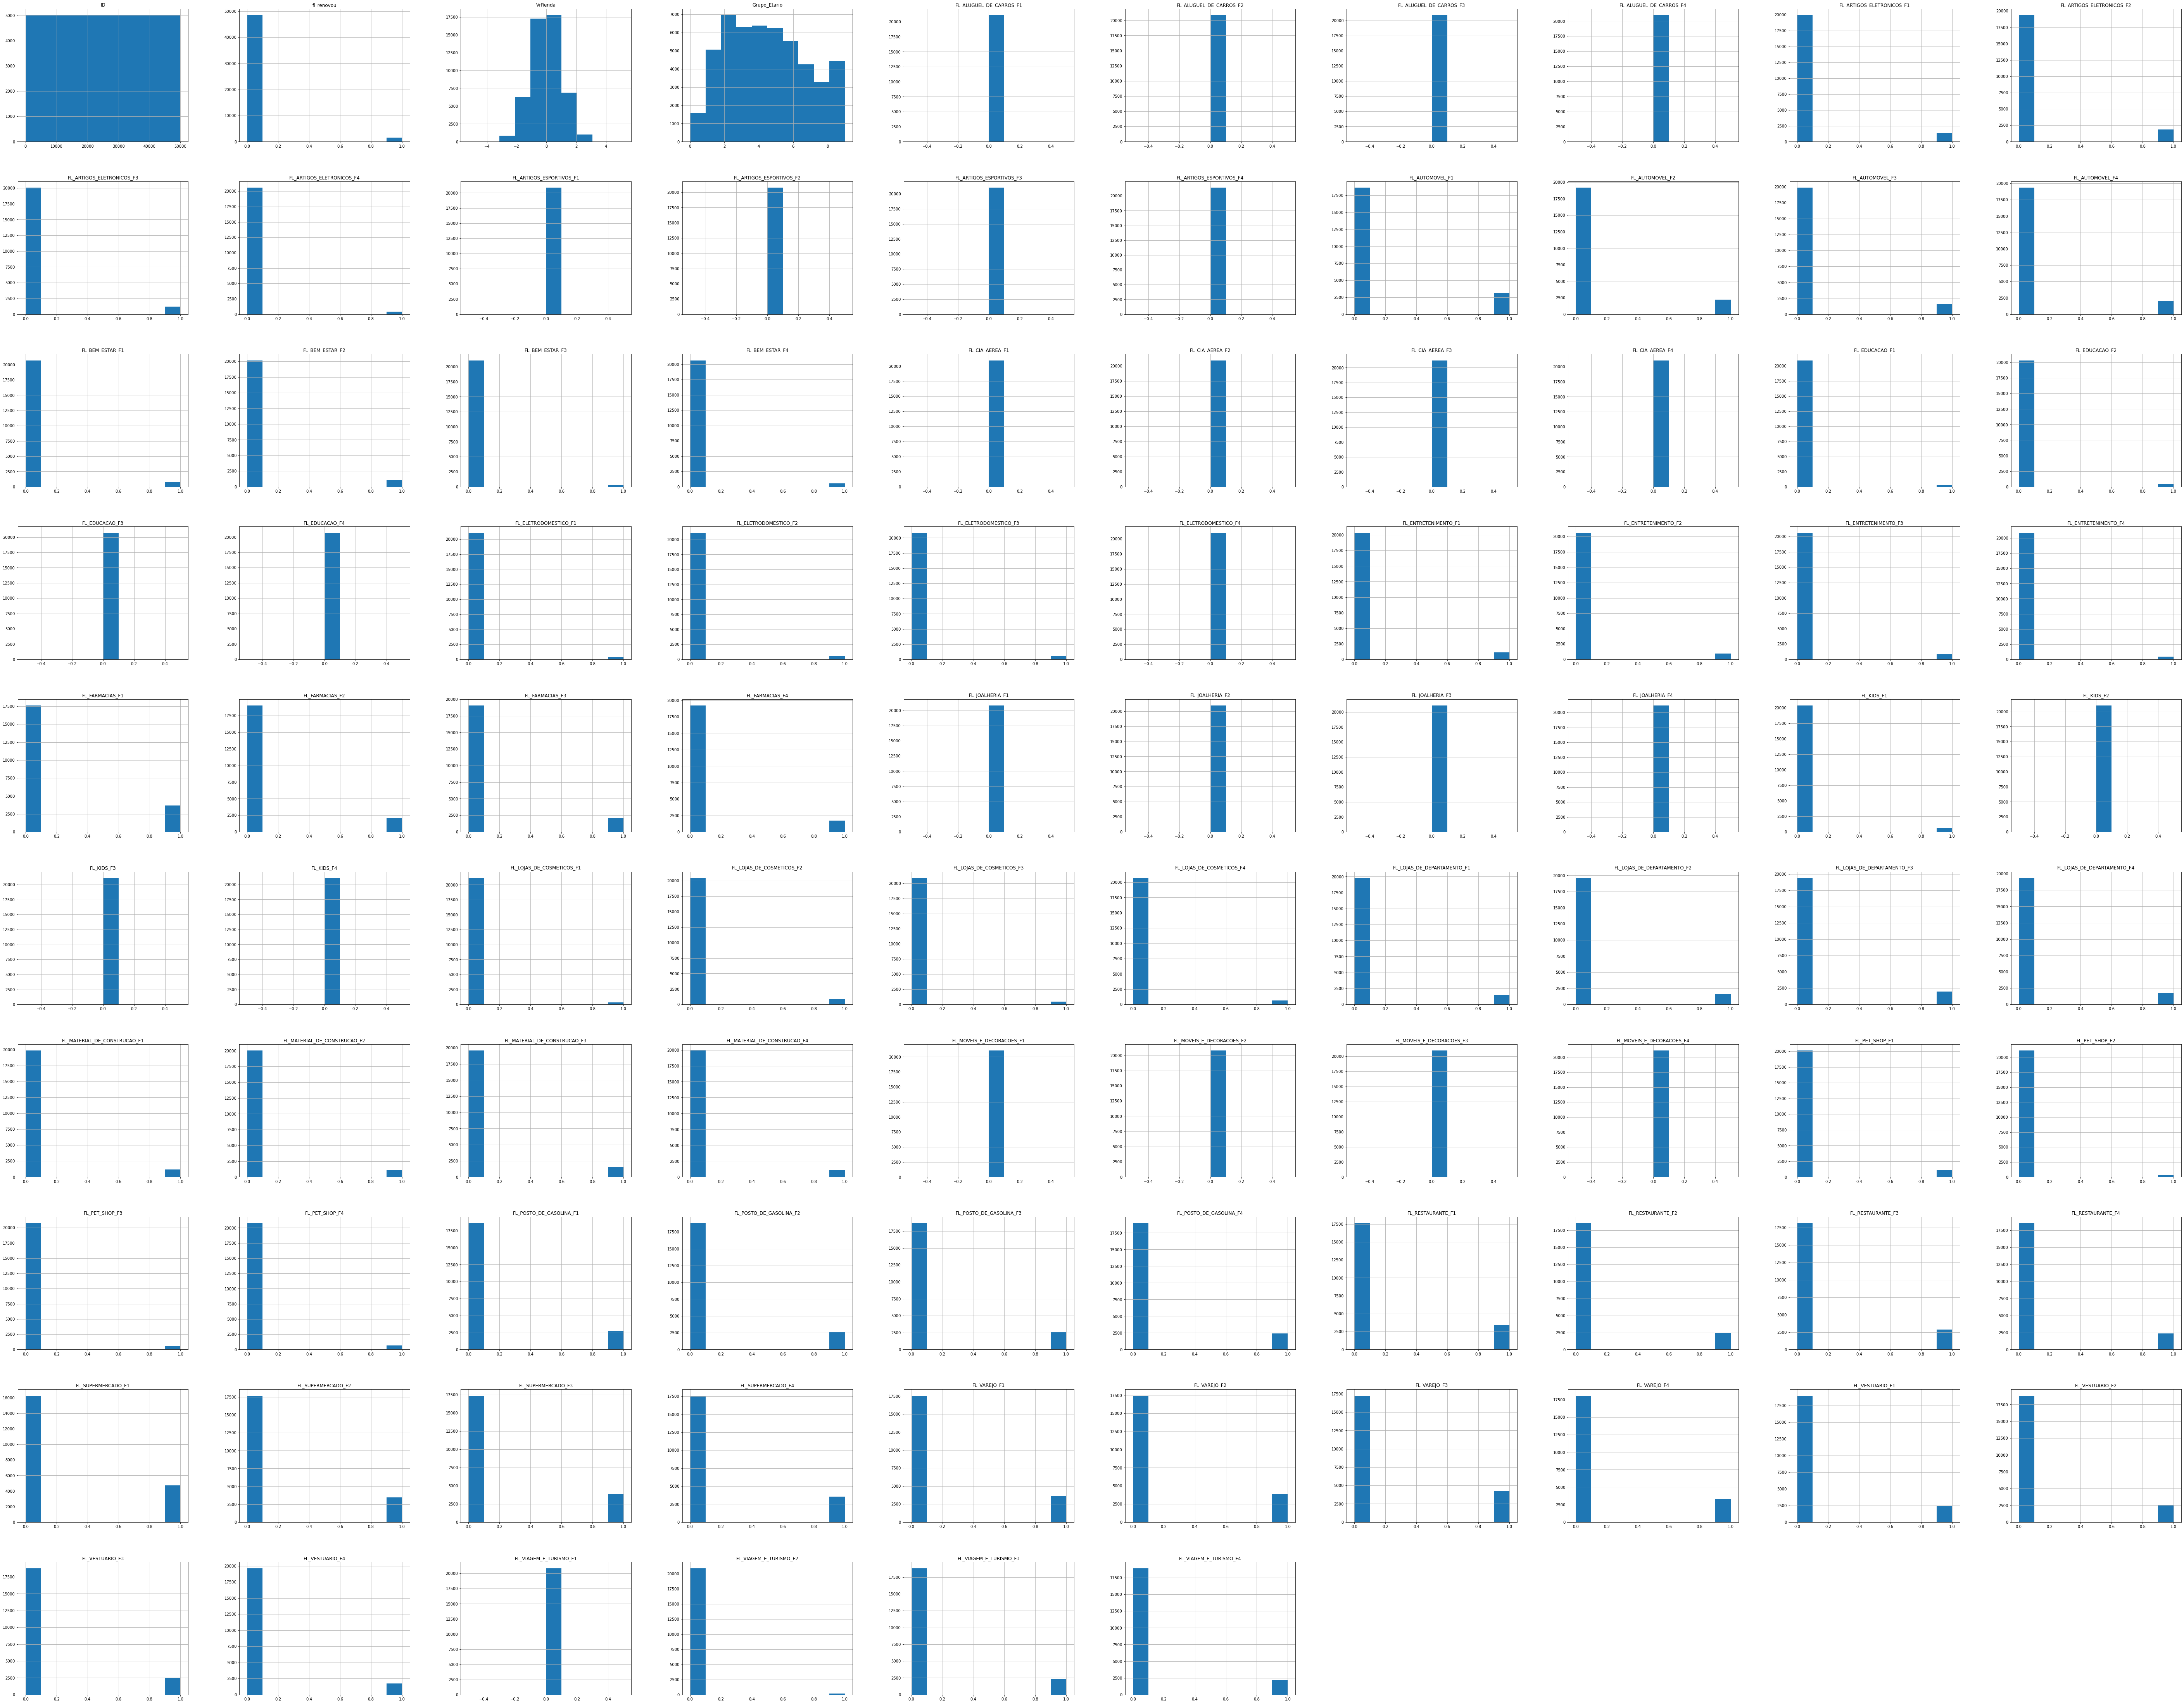

In [ ]:
df.hist(figsize=(100,80));

In [ ]:
# comparar consumo com idade

In [ ]:
# comparar consumo com renda

In [ ]:
# perceber caracteristicas comuns entre perfis de consumidores e comparar com motivo de contrato

In [78]:
query = """SELECT * FROM `hacka-dados.hacka_dados.tabela_dados_hacka` """
job = client.query(query)
df = job.to_dataframe()

<AxesSubplot:>

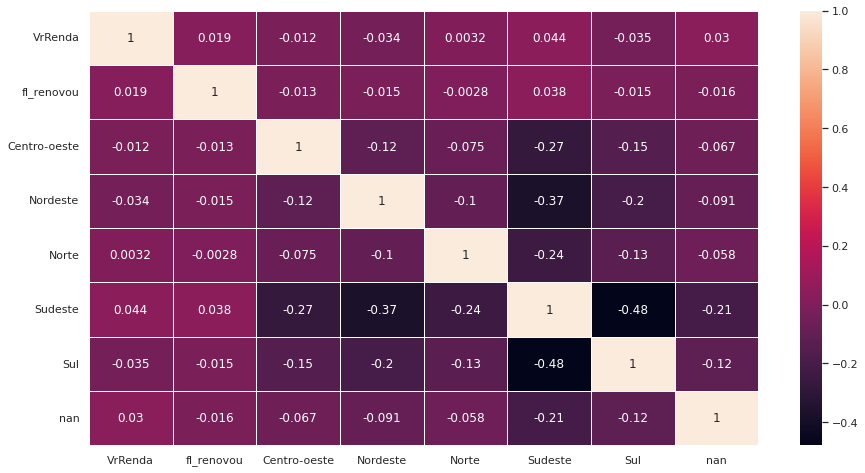

In [79]:
query1 = """SELECT CdUfNaturalidade, VrRenda, CdOcupacaoCBO, fl_renovou FROM `hacka-dados.hacka_dados.tabela_dados_hacka` """
job1 = client.query(query1)
dfCadastrais = job1.to_dataframe()

Cadastrais_Corr = dfCadastrais.join(pd.get_dummies(dfCadastrais['CdUfNaturalidade'])).corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(Cadastrais_Corr, xticklabels=Cadastrais_Corr.columns, yticklabels=Cadastrais_Corr.columns, annot=True, linewidths=1)

In [80]:
query2 = """SELECT NmMotivoContratoFinanceiro, Sub_Produto, VrContrato, VrFinanciamento, VrEntrada, QtParcelas, AaFabricacaoVeiculo, CdMarca, VrMercado, FlZeroKm, QtCilindradaVeiculo, QtQuilometragemVeiculo, QtAnoIdade, fl_renovou FROM `hacka-dados.hacka_dados.tabela_dados_hacka` """
job2 = client.query(query2)
dfContratuais = job2.to_dataframe()
dfContratuais.head()

,NmMotivoContratoFinanceiro,Sub_Produto,VrContrato,VrFinanciamento,VrEntrada,QtParcelas,AaFabricacaoVeiculo,CdMarca,VrMercado,FlZeroKm,QtCilindradaVeiculo,QtQuilometragemVeiculo,QtAnoIdade,fl_renovou
0,FLUXO FINANCEIRO INICIAL,REFINANCIAMENTO VEICULOS DE PASSEIO,0.970832,1.386345,0.870025,60,2021.0,HYUNDAI,1.595703,S,1600.000000,0.0,1.0,0
1,CONTRATO CEDIDO (FIDC),CDC VEICULOS DE PASSEIO,0.743053,0.946475,-1.388334,36,2004.0,VOLKSWAGEN,0.611034,N,1596.900027,115190.0,18.0,0
2,FLUXO FINANCEIRO INICIAL,CDC VEICULOS DE PASSEIO,1.026859,0.536553,1.152621,48,2021.0,HYUNDAI,1.068751,N,1593.364512,115263.0,1.0,0
3,FLUXO FINANCEIRO INICIAL,CDC VEICULOS DE PASSEIO,-0.162695,-0.532558,0.954269,48,2004.0,FORD,-0.522875,N,1600.000000,121981.0,18.0,0
4,FLUXO FINANCEIRO INICIAL,CDC VEICULOS DE PASSEIO,-0.964986,-1.203160,1.097747,60,2021.0,FIAT,-1.623163,N,1000.000000,104178.0,1.0,0


[Text(0.5, 0, 'VrContrato'),
 Text(1.5, 0, 'VrFinanciamento'),
 Text(2.5, 0, 'VrEntrada'),
 Text(3.5, 0, 'QtParcelas'),
 Text(4.5, 0, 'AaFabricacaoVeiculo'),
 Text(5.5, 0, 'VrMercado'),
 Text(6.5, 0, 'QtCilindradaVeiculo'),
 Text(7.5, 0, 'QtQuilometragemVeiculo'),
 Text(8.5, 0, 'QtAnoIdade'),
 Text(9.5, 0, 'fl_renovou')]

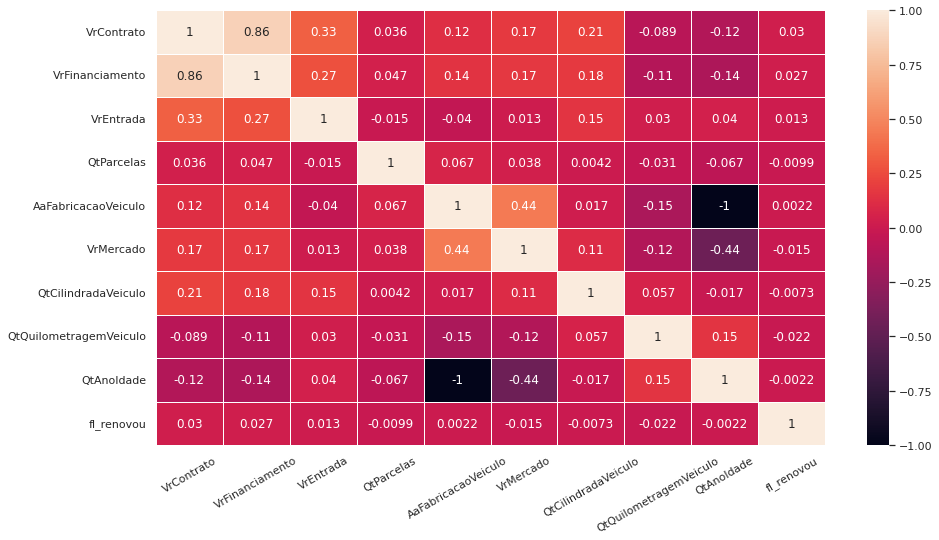

In [81]:
Contratuais_Corr = dfContratuais.corr()
sns.set(rc = {'figure.figsize':(15,8)})
ax = sns.heatmap(Contratuais_Corr, xticklabels=Contratuais_Corr.columns,  yticklabels=Contratuais_Corr.columns, annot=True, linewidths=1)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)


<AxesSubplot:>

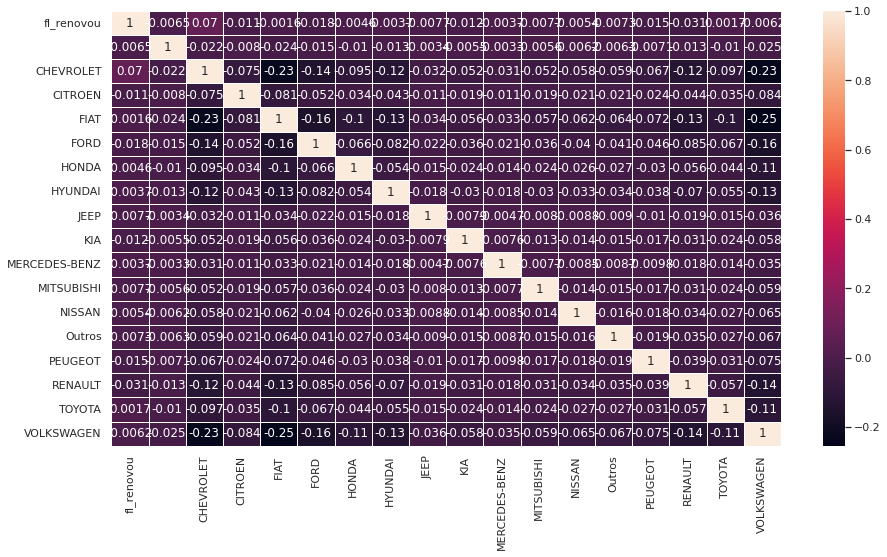

In [82]:
dfMarcas = dfContratuais[['CdMarca', 'fl_renovou']]
Marcas_Corr = dfMarcas.join(pd.get_dummies(dfMarcas['CdMarca'])).corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(Marcas_Corr, xticklabels=Marcas_Corr.columns, yticklabels=Marcas_Corr.columns, annot=True, linewidths=1)

<AxesSubplot:>

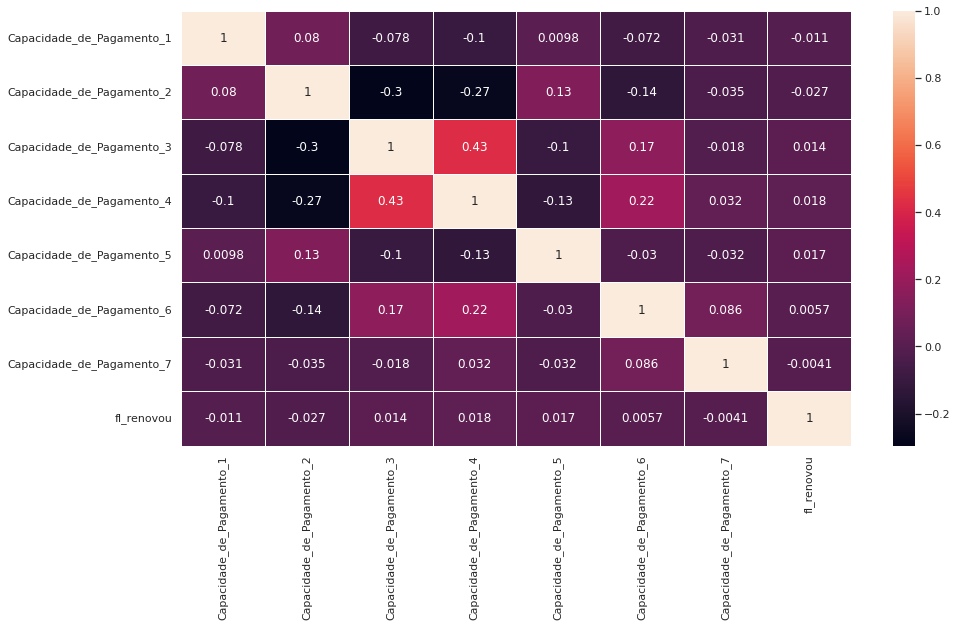

In [83]:
query3 = """SELECT Capacidade_de_Pagamento_1, Capacidade_de_Pagamento_2, Capacidade_de_Pagamento_3, Capacidade_de_Pagamento_4, Capacidade_de_Pagamento_5, Capacidade_de_Pagamento_6, Capacidade_de_Pagamento_7, fl_renovou FROM `hacka-dados.hacka_dados.tabela_dados_hacka` """
job3 = client.query(query3)
dfScores = job3.to_dataframe()

Scores_Corr = dfScores.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(Scores_Corr, xticklabels=Scores_Corr.columns, yticklabels=Scores_Corr.columns, annot=True, linewidths=1)

<AxesSubplot:>

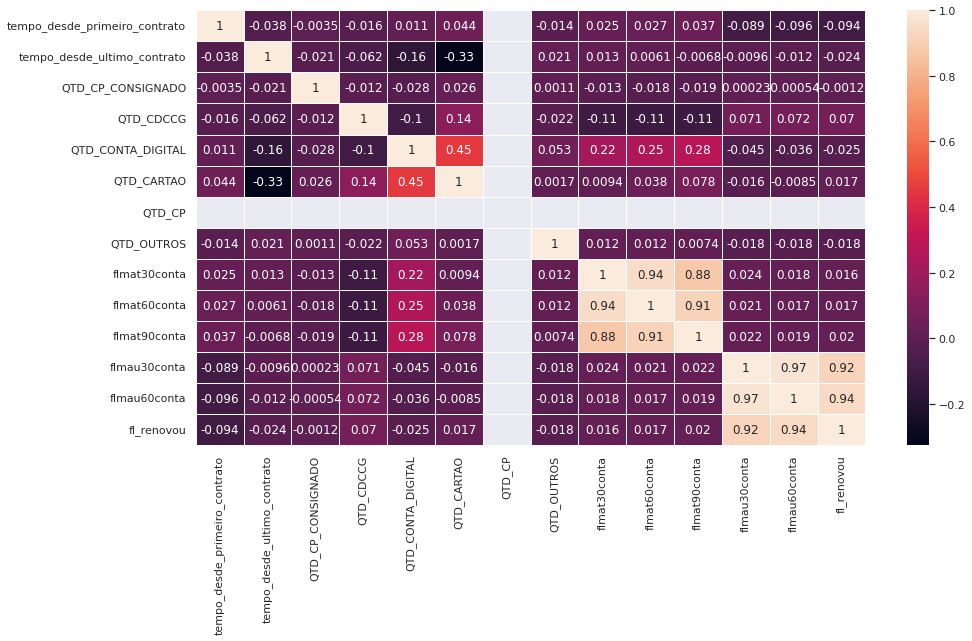

In [93]:
query4 = """
SELECT 
    tempo_desde_primeiro_contrato, 
    tempo_desde_ultimo_contrato, 
    QTD_SEGURO, QTD_CP_CONSIGNADO, 
    QTD_CDCCG, QTD_CONTA_DIGITAL, 
    QTD_CARTAO, QTD_CP, QTD_OUTROS, 
    flmat30conta, 
    flmat60conta, 
    flmat90conta, 
    flmau30conta, 
    flmau60conta, 
    flmau90conta 
    fl_renovou 
    FROM `hacka-dados.hacka_dados.tabela_dados_hacka` """
job4 = client.query(query4)
dfRelacionamentoBV = job4.to_dataframe()

RelacionamentoBV_Corr = dfRelacionamentoBV.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(RelacionamentoBV_Corr, xticklabels=RelacionamentoBV_Corr.columns, yticklabels=RelacionamentoBV_Corr.columns, annot=True, linewidths=1)

In [94]:
df.columns.tolist()

['ID',
 'Capacidade_de_Pagamento_7',
 'tempo_desde_primeiro_contrato',
 'tempo_desde_ultimo_contrato',
 'QTD_SEGURO',
 'QTD_OUTROS',
 'QTD_CP_CONSIGNADO',
 'QTD_CDCCG',
 'QTD_CONTA_DIGITAL',
 'QTD_CARTAO',
 'QTD_CP',
 'FL_ALUGUEL_DE_CARROS_F1',
 'FL_ALUGUEL_DE_CARROS_F2',
 'FL_ALUGUEL_DE_CARROS_F3',
 'FL_ALUGUEL_DE_CARROS_F4',
 'FL_ARTIGOS_ELETRONICOS_F1',
 'FL_ARTIGOS_ELETRONICOS_F2',
 'FL_ARTIGOS_ELETRONICOS_F3',
 'FL_ARTIGOS_ELETRONICOS_F4',
 'FL_ARTIGOS_ESPORTIVOS_F1',
 'FL_ARTIGOS_ESPORTIVOS_F2',
 'FL_ARTIGOS_ESPORTIVOS_F3',
 'FL_ARTIGOS_ESPORTIVOS_F4',
 'FL_AUTOMOVEL_F1',
 'FL_AUTOMOVEL_F2',
 'FL_AUTOMOVEL_F3',
 'FL_AUTOMOVEL_F4',
 'FL_BEM_ESTAR_F1',
 'FL_BEM_ESTAR_F2',
 'FL_BEM_ESTAR_F3',
 'FL_BEM_ESTAR_F4',
 'FL_CIA_AEREA_F1',
 'FL_CIA_AEREA_F2',
 'FL_CIA_AEREA_F3',
 'FL_CIA_AEREA_F4',
 'FL_EDUCACAO_F1',
 'FL_EDUCACAO_F2',
 'FL_EDUCACAO_F3',
 'FL_EDUCACAO_F4',
 'FL_ELETRODOMESTICO_F1',
 'FL_ELETRODOMESTICO_F2',
 'FL_ELETRODOMESTICO_F3',
 'FL_ELETRODOMESTICO_F4',
 'FL_ENTRETENIM

<AxesSubplot:>

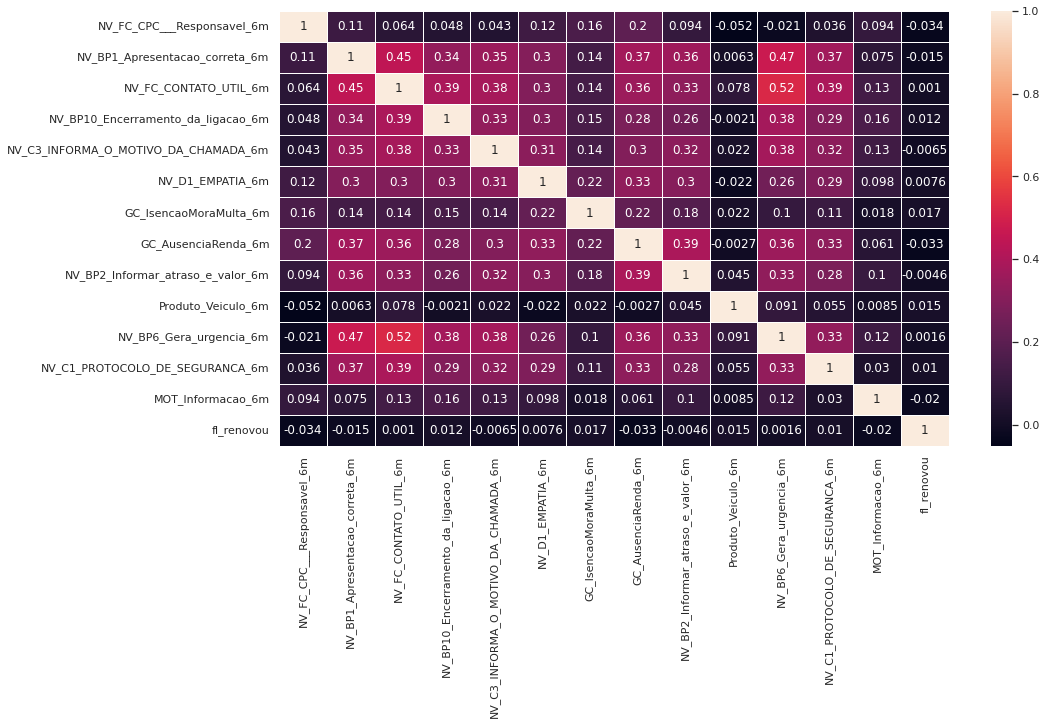

In [95]:
query5 = """ SELECT
    NV_FC_CPC___Responsavel_6m, 
    NV_BP1_Apresentacao_correta_6m ,
    NV_FC_CONTATO_UTIL_6m ,
    NV_BP10_Encerramento_da_ligacao_6m ,
    NV_C3_INFORMA_O_MOTIVO_DA_CHAMADA_6m ,
    NV_D1_EMPATIA_6m ,
    GC_IsencaoMoraMulta_6m ,
    GC_AusenciaRenda_6m ,
    NV_BP2_Informar_atraso_e_valor_6m ,
    Produto_Veiculo_6m ,
    NV_BP6_Gera_urgencia_6m ,
    NV_C1_PROTOCOLO_DE_SEGURANCA_6m ,
    MOT_Informacao_6m ,
    fl_renovou
    FROM `hacka-dados.hacka_dados.tabela_dados_hacka` """
job5 = client.query(query5)
dfMCC1 = job5.to_dataframe()

MCC1_Corr = dfMCC1.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(MCC1_Corr, xticklabels=MCC1_Corr.columns, yticklabels=MCC1_Corr.columns, annot=True, linewidths=1)

In [96]:
df.head()

,ID,Capacidade_de_Pagamento_7,tempo_desde_primeiro_contrato,tempo_desde_ultimo_contrato,QTD_SEGURO,QTD_OUTROS,QTD_CP_CONSIGNADO,QTD_CDCCG,QTD_CONTA_DIGITAL,QTD_CARTAO,QTD_CP,FL_ALUGUEL_DE_CARROS_F1,FL_ALUGUEL_DE_CARROS_F2,FL_ALUGUEL_DE_CARROS_F3,FL_ALUGUEL_DE_CARROS_F4,FL_ARTIGOS_ELETRONICOS_F1,FL_ARTIGOS_ELETRONICOS_F2,FL_ARTIGOS_ELETRONICOS_F3,FL_ARTIGOS_ELETRONICOS_F4,FL_ARTIGOS_ESPORTIVOS_F1,FL_ARTIGOS_ESPORTIVOS_F2,FL_ARTIGOS_ESPORTIVOS_F3,FL_ARTIGOS_ESPORTIVOS_F4,FL_AUTOMOVEL_F1,FL_AUTOMOVEL_F2,FL_AUTOMOVEL_F3,FL_AUTOMOVEL_F4,FL_BEM_ESTAR_F1,FL_BEM_ESTAR_F2,FL_BEM_ESTAR_F3,FL_BEM_ESTAR_F4,FL_CIA_AEREA_F1,FL_CIA_AEREA_F2,FL_CIA_AEREA_F3,FL_CIA_AEREA_F4,FL_EDUCACAO_F1,FL_EDUCACAO_F2,FL_EDUCACAO_F3,FL_EDUCACAO_F4,FL_ELETRODOMESTICO_F1,FL_ELETRODOMESTICO_F2,FL_ELETRODOMESTICO_F3,FL_ELETRODOMESTICO_F4,FL_ENTRETENIMENTO_F1,FL_ENTRETENIMENTO_F2,FL_ENTRETENIMENTO_F3,FL_ENTRETENIMENTO_F4,FL_FARMACIAS_F1,FL_FARMACIAS_F2,FL_FARMACIAS_F3,FL_FARMACIAS_F4,FL_JOALHERIA_F1,FL_JOALHERIA_F2,FL_JOALHERIA_F3,FL_JOALHERIA_F4,FL_KIDS_F1,FL_KIDS_F2,FL_KIDS_F3,FL_KIDS_F4,FL_LOJAS_DE_COSMETICOS_F1,FL_LOJAS_DE_COSMETICOS_F2,FL_LOJAS_DE_COSMETICOS_F3,FL_LOJAS_DE_COSMETICOS_F4,FL_LOJAS_DE_DEPARTAMENTO_F1,FL_LOJAS_DE_DEPARTAMENTO_F2,FL_LOJAS_DE_DEPARTAMENTO_F3,FL_LOJAS_DE_DEPARTAMENTO_F4,FL_MATERIAL_DE_CONSTRUCAO_F1,FL_MATERIAL_DE_CONSTRUCAO_F2,FL_MATERIAL_DE_CONSTRUCAO_F3,FL_MATERIAL_DE_CONSTRUCAO_F4,FL_MOVEIS_E_DECORACOES_F1,FL_MOVEIS_E_DECORACOES_F2,FL_MOVEIS_E_DECORACOES_F3,FL_MOVEIS_E_DECORACOES_F4,FL_PET_SHOP_F1,FL_PET_SHOP_F2,FL_PET_SHOP_F3,FL_PET_SHOP_F4,FL_POSTO_DE_GASOLINA_F1,FL_POSTO_DE_GASOLINA_F2,FL_POSTO_DE_GASOLINA_F3,FL_POSTO_DE_GASOLINA_F4,FL_RESTAURANTE_F1,FL_RESTAURANTE_F2,FL_RESTAURANTE_F3,FL_RESTAURANTE_F4,FL_SUPERMERCADO_F1,FL_SUPERMERCADO_F2,FL_SUPERMERCADO_F3,FL_SUPERMERCADO_F4,FL_VAREJO_F1,FL_VAREJO_F2,FL_VAREJO_F3,FL_VAREJO_F4,FL_VESTUARIO_F1,FL_VESTUARIO_F2,FL_VESTUARIO_F3,FL_VESTUARIO_F4,FL_VIAGEM_E_TURISMO_F1,FL_VIAGEM_E_TURISMO_F2,FL_VIAGEM_E_TURISMO_F3,FL_VIAGEM_E_TURISMO_F4,NmMotivoContratoFinanceiro,Sub_Produto,VrContrato,VrEntrada,QtParcelas,AaFabricacaoVeiculo,CdMarca,VrMercado,FlZeroKm,QtCilindradaVeiculo,QtQuilometragemVeiculo,QtAnoIdade,VrRenda,CdUfNaturalidade,CdOcupacaoCBO,Grupo_Etario,Capacidade_de_Pagamento_1,Capacidade_de_Pagamento_2,Capacidade_de_Pagamento_3,Capacidade_de_Pagamento_4,Capacidade_de_Pagamento_5,Capacidade_de_Pagamento_6,flmat30conta,flmat60conta,flmat90conta,flmau30conta,flmau60conta,flmau90conta,total_ALUGUEL_DE_CARROS_F1_m4,total_ALUGUEL_DE_CARROS_F2_m4,total_ALUGUEL_DE_CARROS_F3_m4,total_ALUGUEL_DE_CARROS_F4_m4,total_ARTIGOS_ELETRONICOS_F1_m4,total_ARTIGOS_ELETRONICOS_F2_m4,total_ARTIGOS_ELETRONICOS_F3_m4,total_ARTIGOS_ELETRONICOS_F4_m4,total_ARTIGOS_ESPORTIVOS_F1_m4,total_ARTIGOS_ESPORTIVOS_F2_m4,total_ARTIGOS_ESPORTIVOS_F3_m4,total_ARTIGOS_ESPORTIVOS_F4_m4,total_AUTOMOVEL_F1_m4,total_AUTOMOVEL_F2_m4,total_AUTOMOVEL_F3_m4,total_AUTOMOVEL_F4_m4,total_BEM_ESTAR_F1_m4,total_BEM_ESTAR_F2_m4,total_BEM_ESTAR_F3_m4,total_BEM_ESTAR_F4_m4,total_CIA_AEREA_F1_m4,total_CIA_AEREA_F2_m4,total_CIA_AEREA_F3_m4,total_CIA_AEREA_F4_m4,total_EDUCACAO_F1_m4,total_EDUCACAO_F2_m4,total_EDUCACAO_F3_m4,total_EDUCACAO_F4_m4,total_ELETRODOMESTICO_F1_m4,total_ELETRODOMESTICO_F2_m4,total_ELETRODOMESTICO_F3_m4,total_ELETRODOMESTICO_F4_m4,total_ENTRETENIMENTO_F1_m4,total_ENTRETENIMENTO_F2_m4,total_ENTRETENIMENTO_F3_m4,total_ENTRETENIMENTO_F4_m4,total_FARMACIAS_F1_m4,total_FARMACIAS_F2_m4,total_FARMACIAS_F3_m4,total_FARMACIAS_F4_m4,total_JOALHERIA_F1_m4,total_JOALHERIA_F2_m4,total_JOALHERIA_F3_m4,total_JOALHERIA_F4_m4,total_KIDS_F1_m4,total_KIDS_F2_m4,total_KIDS_F3_m4,total_KIDS_F4_m4,total_LOJAS_DE_COSMETICOS_F1_m4,total_LOJAS_DE_COSMETICOS_F2_m4,total_LOJAS_DE_COSMETICOS_F3_m4,total_LOJAS_DE_COSMETICOS_F4_m4,total_LOJAS_DE_DEPARTAMENTO_F1_m4,total_LOJAS_DE_DEPARTAMENTO_F2_m4,total_LOJAS_DE_DEPARTAMENTO_F3_m4,total_LOJAS_DE_DEPARTAMENTO_F4_m4,total_MATERIAL_DE_CONSTRUCAO_F1_m4,total_MATERIAL_DE_CONSTRUCAO_F2_m4,total_

<AxesSubplot:>

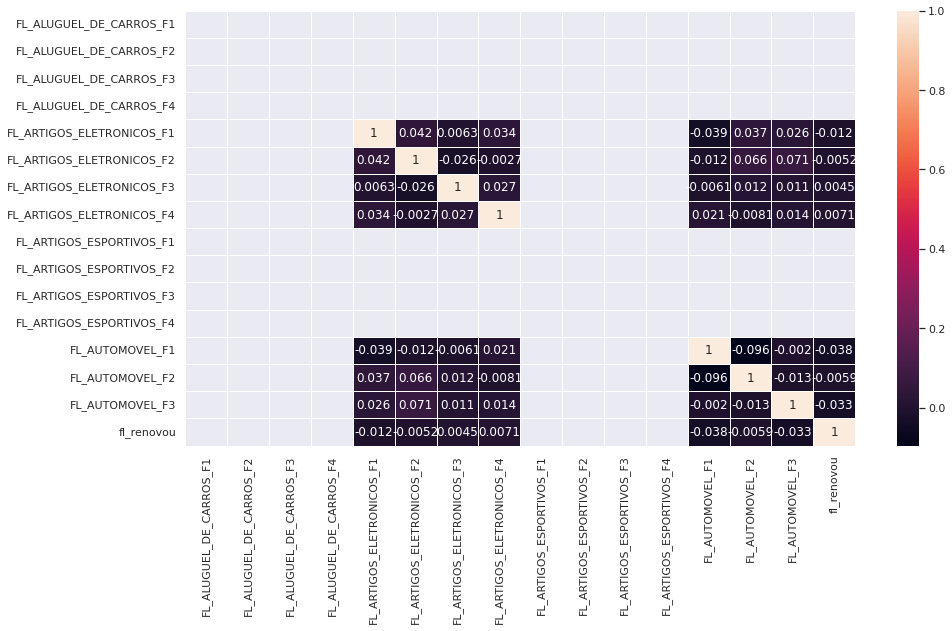

In [97]:
query6 = """
    Select
    FL_ALUGUEL_DE_CARROS_F1 ,
    FL_ALUGUEL_DE_CARROS_F2 ,
    FL_ALUGUEL_DE_CARROS_F3 ,
    FL_ALUGUEL_DE_CARROS_F4 ,
    FL_ARTIGOS_ELETRONICOS_F1 ,
    FL_ARTIGOS_ELETRONICOS_F2 ,
    FL_ARTIGOS_ELETRONICOS_F3 ,
    FL_ARTIGOS_ELETRONICOS_F4 ,
    FL_ARTIGOS_ESPORTIVOS_F1 ,
    FL_ARTIGOS_ESPORTIVOS_F2 ,
    FL_ARTIGOS_ESPORTIVOS_F3 ,
    FL_ARTIGOS_ESPORTIVOS_F4 ,
    FL_AUTOMOVEL_F1 ,
    FL_AUTOMOVEL_F2 ,
    FL_AUTOMOVEL_F3 ,
    FL_AUTOMOVEL_F4
    fl_renovou
    FROM `hacka-dados.hacka_dados.tabela_dados_hacka` 
    """
job6 = client.query(query6)
dfFL = job6.to_dataframe()

dfFL_Corr = dfFL.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(dfFL_Corr, xticklabels=dfFL_Corr.columns, yticklabels=dfFL_Corr.columns, annot=True, linewidths=1)

In [98]:
df2 =  df[["CdOcupacaoCBO", "fl_renovou"]]

df3 = df2[df2['fl_renovou']==1]
df3.value_counts()

CdOcupacaoCBO  fl_renovou
Indeterminado  1             286
2684           1             278
7897           1             257
Outros         1             134
5411           1              73
7598           1              43
3995           1              43
6568           1              38
1103           1              36
5078           1              31
7906           1              27
2362           1              24
1988           1              22
7898           1              22
8022           1              21
3968           1              18
1191           1              16
8069           1              15
9502           1              14
10101          1              13
2210           1              13
4140           1              12
1933           1              11
8673           1              10
8700           1              10
297            1              10
6508           1              10
8620           1              10
7328           1               9
9170           1 

# Data manipulation

In [109]:
query = """SELECT * FROM `hacka-dados.hacka_dados.tabela_dados_hacka` """
job = client.query(query)
df = job.to_dataframe()

In [110]:
df["tempo_relacionamento"] = (df["tempo_desde_primeiro_contrato"] - df["tempo_desde_ultimo_contrato"]) / 30
df["tempo_ult_contrato"] = (df["tempo_desde_ultimo_contrato"]) / 30


df['FL_ALUGUEL_DE_CARROS_max']=np.where(df['FL_ALUGUEL_DE_CARROS_F4'] == 1, 4,np.where(df['FL_ALUGUEL_DE_CARROS_F3'] == 1, 3,np.where(df['FL_ALUGUEL_DE_CARROS_F2'] == 1, 2,np.where(df['FL_ALUGUEL_DE_CARROS_F1'] == 1, 1,0))))
df['FL_ARTIGOS_ELETRONICOS_max']=np.where(df['FL_ARTIGOS_ELETRONICOS_F4'] == 1, 4,np.where(df['FL_ARTIGOS_ELETRONICOS_F3'] == 1, 3,np.where(df['FL_ARTIGOS_ELETRONICOS_F2'] == 1, 2,np.where(df['FL_ARTIGOS_ELETRONICOS_F1'] == 1, 1,0))))
df['FL_ARTIGOS_ESPORTIVOS_max']=np.where(df['FL_ARTIGOS_ESPORTIVOS_F4'] == 1, 4,np.where(df['FL_ARTIGOS_ESPORTIVOS_F3'] == 1, 3,np.where(df['FL_ARTIGOS_ESPORTIVOS_F2'] == 1, 2,np.where(df['FL_ARTIGOS_ESPORTIVOS_F1'] == 1, 1,0))))
df['FL_AUTOMOVEL_max']=np.where(df['FL_AUTOMOVEL_F4'] == 1, 4,np.where(df['FL_AUTOMOVEL_F3'] == 1, 3,np.where(df['FL_AUTOMOVEL_F2'] == 1, 2,np.where(df['FL_AUTOMOVEL_F1'] == 1, 1,0))))
df['FL_BEM_ESTAR_max']=np.where(df['FL_BEM_ESTAR_F4'] == 1, 4,np.where(df['FL_BEM_ESTAR_F3'] == 1, 3,np.where(df['FL_BEM_ESTAR_F2'] == 1, 2,np.where(df['FL_BEM_ESTAR_F1'] == 1, 1,0))))
df['FL_CIA_AEREA_max']=np.where(df['FL_CIA_AEREA_F4'] == 1, 4,np.where(df['FL_CIA_AEREA_F3'] == 1, 3,np.where(df['FL_CIA_AEREA_F2'] == 1, 2,np.where(df['FL_CIA_AEREA_F1'] == 1, 1,0))))
df['FL_EDUCACAO_max']=np.where(df['FL_EDUCACAO_F4'] == 1, 4,np.where(df['FL_EDUCACAO_F3'] == 1, 3,np.where(df['FL_EDUCACAO_F2'] == 1, 2,np.where(df['FL_EDUCACAO_F1'] == 1, 1,0))))
df['FL_ELETRODOMESTICO_max']=np.where(df['FL_ELETRODOMESTICO_F4'] == 1, 4,np.where(df['FL_ELETRODOMESTICO_F3'] == 1, 3,np.where(df['FL_ELETRODOMESTICO_F2'] == 1, 2,np.where(df['FL_ELETRODOMESTICO_F1'] == 1, 1,0))))
df['FL_ENTRETENIMENTO_max']=np.where(df['FL_ENTRETENIMENTO_F4'] == 1, 4,np.where(df['FL_ENTRETENIMENTO_F3'] == 1, 3,np.where(df['FL_ENTRETENIMENTO_F2'] == 1, 2,np.where(df['FL_ENTRETENIMENTO_F1'] == 1, 1,0))))
df['FL_FARMACIAS_max']=np.where(df['FL_FARMACIAS_F4'] == 1, 4,np.where(df['FL_FARMACIAS_F3'] == 1, 3,np.where(df['FL_FARMACIAS_F2'] == 1, 2,np.where(df['FL_FARMACIAS_F1'] == 1, 1,0))))
df['FL_JOALHERIA_max']=np.where(df['FL_JOALHERIA_F4'] == 1, 4,np.where(df['FL_JOALHERIA_F3'] == 1, 3,np.where(df['FL_JOALHERIA_F2'] == 1, 2,np.where(df['FL_JOALHERIA_F1'] == 1, 1,0))))
df['FL_KIDS_max']=np.where(df['FL_KIDS_F4'] == 1, 4,np.where(df['FL_KIDS_F3'] == 1, 3,np.where(df['FL_KIDS_F2'] == 1, 2,np.where(df['FL_KIDS_F1'] == 1, 1,0))))
df['FL_LOJAS_DE_COSMETICOS_max']=np.where(df['FL_LOJAS_DE_COSMETICOS_F4'] == 1, 4,np.where(df['FL_LOJAS_DE_COSMETICOS_F3'] == 1, 3,np.where(df['FL_LOJAS_DE_COSMETICOS_F2'] == 1, 2,np.where(df['FL_LOJAS_DE_COSMETICOS_F1'] == 1, 1,0))))
df['FL_LOJAS_DE_DEPARTAMENTO_max']=np.where(df['FL_LOJAS_DE_DEPARTAMENTO_F4'] == 1, 4,np.where(df['FL_LOJAS_DE_DEPARTAMENTO_F3'] == 1, 3,np.where(df['FL_LOJAS_DE_DEPARTAMENTO_F2'] == 1, 2,np.where(df['FL_LOJAS_DE_DEPARTAMENTO_F1'] == 1, 1,0))))
df['FL_MATERIAL_DE_CONSTRUCAO_max']=np.where(df['FL_MATERIAL_DE_CONSTRUCAO_F4'] == 1, 4,np.where(df['FL_MATERIAL_DE_CONSTRUCAO_F3'] == 1, 3,np.where(df['FL_MATERIAL_DE_CONSTRUCAO_F2'] == 1, 2,np.where(df['FL_MATERIAL_DE_CONSTRUCAO_F1'] == 1, 1,0))))
df['FL_MOVEIS_E_DECORACOES_max']=np.where(df['FL_MOVEIS_E_DECORACOES_F4'] == 1, 4,np.where(df['FL_MOVEIS_E_DECORACOES_F3'] == 1, 3,np.where(df['FL_MOVEIS_E_DECORACOES_F2'] == 1, 2,np.where(df['FL_MOVEIS_E_DECORACOES_F1'] == 1, 1,0))))
df['FL_PET_SHOP_max']=np.where(df['FL_PET_SHOP_F4'] == 1, 4,np.where(df['FL_PET_SHOP_F3'] == 1, 3,np.where(df['FL_PET_SHOP_F2'] == 1, 2,np.where(df['FL_PET_SHOP_F1'] == 1, 1,0))))
df['FL_POSTO_DE_GASOLINA_max']=np.where(df['FL_POSTO_DE_GASOLINA_F4'] == 1, 4,np.where(df['FL_POSTO_DE_GASOLINA_F3'] == 1, 3,np.where(df['FL_POSTO_DE_GASOLINA_F2'] == 1, 2,np.where(df['FL_POSTO_DE_GASOLINA_F1'] == 1, 1,0))))
df['FL_RESTAURANTE_max']=np.where(df['FL_RESTAURANTE_F4'] == 1, 4,np.where(df['FL_RESTAURANTE_F3'] == 1, 3,np.where(df['FL_RESTAURANTE_F2'] == 1, 2,np.where(df['FL_RESTAURANTE_F1'] == 1, 1,0))))
df['FL_SUPERMERCADO_max']=np.where(df['FL_SUPERMERCADO_F4'] == 1, 4,np.where(df['FL_SUPERMERCADO_F3'] == 1, 3,np.where(df['FL_SUPERMERCADO_F2'] == 1, 2,np.where(df['FL_SUPERMERCADO_F1'] == 1, 1,0))))
df['FL_VAREJO_max']=np.where(df['FL_VAREJO_F4'] == 1, 4,np.where(df['FL_VAREJO_F3'] == 1, 3,np.where(df['FL_VAREJO_F2'] == 1, 2,np.where(df['FL_VAREJO_F1'] == 1, 1,0))))
df['FL_VESTUARIO_max']=np.where(df['FL_VESTUARIO_F4'] == 1, 4,np.where(df['FL_VESTUARIO_F3'] == 1, 3,np.where(df['FL_VESTUARIO_F2'] == 1, 2,np.where(df['FL_VESTUARIO_F1'] == 1, 1,0))))
df['FL_VIAGEM_E_TURISMO_max']=np.where(df['FL_VIAGEM_E_TURISMO_F4'] == 1, 4,np.where(df['FL_VIAGEM_E_TURISMO_F3'] == 1, 3,np.where(df['FL_VIAGEM_E_TURISMO_F2'] == 1, 2,np.where(df['FL_VIAGEM_E_TURISMO_F1'] == 1, 1,0))))

df['total_ALUGUEL_DE_CARROS_max']=np.where(df['total_ALUGUEL_DE_CARROS_F4_m4'] >= 1, 4,np.where(df['total_ALUGUEL_DE_CARROS_F3_m4'] >= 1, 3,np.where(df['total_ALUGUEL_DE_CARROS_F2_m4'] >= 1, 2,np.where(df['total_ALUGUEL_DE_CARROS_F1_m4'] >= 1, 1,0))))
df['total_ARTIGOS_ELETRONICOS_max']=np.where(df['total_ARTIGOS_ELETRONICOS_F4_m4'] == 1, 4,np.where(df['total_ARTIGOS_ELETRONICOS_F3_m4'] >= 1, 3,np.where(df['total_ARTIGOS_ELETRONICOS_F2_m4'] >= 1, 2,np.where(df['total_ARTIGOS_ELETRONICOS_F1_m4'] >= 1, 1,0))))
df['total_ARTIGOS_ESPORTIVOS_max']=np.where(df['total_ARTIGOS_ESPORTIVOS_F4_m4'] == 1, 4,np.where(df['total_ARTIGOS_ESPORTIVOS_F3_m4'] >= 1, 3,np.where(df['total_ARTIGOS_ESPORTIVOS_F2_m4'] >= 1, 2,np.where(df['total_ARTIGOS_ESPORTIVOS_F1_m4'] >= 1, 1,0))))
df['total_AUTOMOVEL_max']=np.where(df['total_AUTOMOVEL_F4_m4'] == 1, 4,np.where(df['total_AUTOMOVEL_F3_m4'] >= 1, 3,np.where(df['total_AUTOMOVEL_F2_m4'] >= 1, 2,np.where(df['total_AUTOMOVEL_F1_m4'] >= 1, 1,0))))
df['total_BEM_ESTAR_max']=np.where(df['total_BEM_ESTAR_F4_m4'] == 1, 4,np.where(df['total_BEM_ESTAR_F3_m4'] >= 1, 3,np.where(df['total_BEM_ESTAR_F2_m4'] >= 1, 2,np.where(df['total_BEM_ESTAR_F1_m4'] >= 1, 1,0))))
df['total_CIA_AEREA_max']=np.where(df['total_CIA_AEREA_F4_m4'] == 1, 4,np.where(df['total_CIA_AEREA_F3_m4'] >= 1, 3,np.where(df['total_CIA_AEREA_F2_m4'] >= 1, 2,np.where(df['total_CIA_AEREA_F1_m4'] >= 1, 1,0))))
df['total_EDUCACAO_max']=np.where(df['total_EDUCACAO_F4_m4'] == 1, 4,np.where(df['total_EDUCACAO_F3_m4'] >= 1, 3,np.where(df['total_EDUCACAO_F2_m4'] >= 1, 2,np.where(df['total_EDUCACAO_F1_m4'] >= 1, 1,0))))
df['total_ELETRODOMESTICO_max']=np.where(df['total_ELETRODOMESTICO_F4_m4'] == 1, 4,np.where(df['total_ELETRODOMESTICO_F3_m4'] >= 1, 3,np.where(df['total_ELETRODOMESTICO_F2_m4'] >= 1, 2,np.where(df['total_ELETRODOMESTICO_F1_m4'] >= 1, 1,0))))
df['total_ENTRETENIMENTO_max']=np.where(df['total_ENTRETENIMENTO_F4_m4'] == 1, 4,np.where(df['total_ENTRETENIMENTO_F3_m4'] >= 1, 3,np.where(df['total_ENTRETENIMENTO_F2_m4'] >= 1, 2,np.where(df['total_ENTRETENIMENTO_F1_m4'] >= 1, 1,0))))
df['total_FARMACIAS_max']=np.where(df['total_FARMACIAS_F4_m4'] == 1, 4,np.where(df['total_FARMACIAS_F3_m4'] >= 1, 3,np.where(df['total_FARMACIAS_F2_m4'] >= 1, 2,np.where(df['total_FARMACIAS_F1_m4'] >= 1, 1,0))))
df['total_JOALHERIA_max']=np.where(df['total_JOALHERIA_F4_m4'] == 1, 4,np.where(df['total_JOALHERIA_F3_m4'] >= 1, 3,np.where(df['total_JOALHERIA_F2_m4'] >= 1, 2,np.where(df['total_JOALHERIA_F1_m4'] >= 1, 1,0))))
df['total_KIDS_max']=np.where(df['total_KIDS_F4_m4'] == 1, 4,np.where(df['total_KIDS_F3_m4'] >= 1, 3,np.where(df['total_KIDS_F2_m4'] >= 1, 2,np.where(df['total_KIDS_F1_m4'] >= 1, 1,0))))
df['total_LOJAS_DE_COSMETICOS_max']=np.where(df['total_LOJAS_DE_COSMETICOS_F4_m4'] == 1, 4,np.where(df['total_LOJAS_DE_COSMETICOS_F3_m4'] >= 1, 3,np.where(df['total_LOJAS_DE_COSMETICOS_F2_m4'] >= 1, 2,np.where(df['total_LOJAS_DE_COSMETICOS_F1_m4'] >= 1, 1,0))))
df['total_LOJAS_DE_DEPARTAMENTO_max']=np.where(df['total_LOJAS_DE_DEPARTAMENTO_F4_m4'] == 1, 4,np.where(df['total_LOJAS_DE_DEPARTAMENTO_F3_m4'] >= 1, 3,np.where(df['total_LOJAS_DE_DEPARTAMENTO_F2_m4'] >= 1, 2,np.where(df['total_LOJAS_DE_DEPARTAMENTO_F1_m4'] >= 1, 1,0))))
df['total_MATERIAL_DE_CONSTRUCAO_max']=np.where(df['total_MATERIAL_DE_CONSTRUCAO_F4_m4'] == 1, 4,np.where(df['total_MATERIAL_DE_CONSTRUCAO_F3_m4'] >= 1, 3,np.where(df['total_MATERIAL_DE_CONSTRUCAO_F2_m4'] >= 1, 2,np.where(df['total_MATERIAL_DE_CONSTRUCAO_F1_m4'] >= 1, 1,0))))
df['total_MOVEIS_E_DECORACOES_max']=np.where(df['total_MOVEIS_E_DECORACOES_F4_m4'] == 1, 4,np.where(df['total_MOVEIS_E_DECORACOES_F3_m4'] >= 1, 3,np.where(df['total_MOVEIS_E_DECORACOES_F2_m4'] >= 1, 2,np.where(df['total_MOVEIS_E_DECORACOES_F1_m4'] >= 1, 1,0))))
df['total_PET_SHOP_max']=np.where(df['total_PET_SHOP_F4_m4'] == 1, 4,np.where(df['total_PET_SHOP_F3_m4'] >= 1, 3,np.where(df['total_PET_SHOP_F2_m4'] >= 1, 2,np.where(df['total_PET_SHOP_F1_m4'] >= 1, 1,0))))
df['total_POSTO_DE_GASOLINA_max']=np.where(df['total_POSTO_DE_GASOLINA_F4_m4'] == 1, 4,np.where(df['total_POSTO_DE_GASOLINA_F3_m4'] >= 1, 3,np.where(df['total_POSTO_DE_GASOLINA_F2_m4'] >= 1, 2,np.where(df['total_POSTO_DE_GASOLINA_F1_m4'] >= 1, 1,0))))
df['total_RESTAURANTE_max']=np.where(df['total_RESTAURANTE_F4_m4'] == 1, 4,np.where(df['total_RESTAURANTE_F3_m4'] >= 1, 3,np.where(df['total_RESTAURANTE_F2_m4'] >= 1, 2,np.where(df['total_RESTAURANTE_F1_m4'] >= 1, 1,0))))
df['total_SUPERMERCADO_max']=np.where(df['total_SUPERMERCADO_F4_m4'] == 1, 4,np.where(df['total_SUPERMERCADO_F3_m4'] >= 1, 3,np.where(df['total_SUPERMERCADO_F2_m4'] >= 1, 2,np.where(df['total_SUPERMERCADO_F1_m4'] >= 1, 1,0))))
df['total_VAREJO_max']=np.where(df['total_VAREJO_F4_m4'] == 1, 4,np.where(df['total_VAREJO_F3_m4'] >= 1, 3,np.where(df['total_VAREJO_F2_m4'] >= 1, 2,np.where(df['total_VAREJO_F1_m4'] >= 1, 1,0))))
df['total_VESTUARIO_max']=np.where(df['total_VESTUARIO_F4_m4'] == 1, 4,np.where(df['total_VESTUARIO_F3_m4'] >= 1, 3,np.where(df['total_VESTUARIO_F2_m4'] >= 1, 2,np.where(df['total_VESTUARIO_F1_m4'] >= 1, 1,0))))
df['total_VIAGEM_E_TURISMO_max']=np.where(df['total_VIAGEM_E_TURISMO_F4_m4'] == 1, 4,np.where(df['total_VIAGEM_E_TURISMO_F3_m4'] >= 1, 3,np.where(df['total_VIAGEM_E_TURISMO_F2_m4'] >= 1, 2,np.where(df['total_VIAGEM_E_TURISMO_F1_m4'] >= 1, 1,0))))


df['total_ALUGUEL_DE_CARROS_f_max']=np.where(df['total_ALUGUEL_DE_CARROS_F4_m4'] >= 1, df['total_ALUGUEL_DE_CARROS_F4_m4'],np.where(df['total_ALUGUEL_DE_CARROS_F3_m4'] >= 1, df['total_ALUGUEL_DE_CARROS_F3_m4'],np.where(df['total_ALUGUEL_DE_CARROS_F2_m4'] >= 1, df['total_ALUGUEL_DE_CARROS_F2_m4'],np.where(df['total_ALUGUEL_DE_CARROS_F1_m4'] >= 1, df['total_ALUGUEL_DE_CARROS_F1_m4'],0))))
df['total_ARTIGOS_ELETRONICOS_f_max']=np.where(df['total_ARTIGOS_ELETRONICOS_F4_m4'] >= 1, df['total_ARTIGOS_ELETRONICOS_F4_m4'],np.where(df['total_ARTIGOS_ELETRONICOS_F3_m4'] >= 1, df['total_ARTIGOS_ELETRONICOS_F3_m4'],np.where(df['total_ARTIGOS_ELETRONICOS_F2_m4'] >= 1, df['total_ARTIGOS_ELETRONICOS_F2_m4'],np.where(df['total_ARTIGOS_ELETRONICOS_F1_m4'] >= 1, df['total_ARTIGOS_ELETRONICOS_F1_m4'],0))))
df['total_ARTIGOS_ESPORTIVOS_f_max']=np.where(df['total_ARTIGOS_ESPORTIVOS_F4_m4'] >= 1, df['total_ARTIGOS_ESPORTIVOS_F4_m4'],np.where(df['total_ARTIGOS_ESPORTIVOS_F3_m4'] >= 1, df['total_ARTIGOS_ESPORTIVOS_F3_m4'],np.where(df['total_ARTIGOS_ESPORTIVOS_F2_m4'] >= 1, df['total_ARTIGOS_ESPORTIVOS_F2_m4'],np.where(df['total_ARTIGOS_ESPORTIVOS_F1_m4'] >= 1, df['total_ARTIGOS_ESPORTIVOS_F1_m4'],0))))
df['total_AUTOMOVEL_f_max']=np.where(df['total_AUTOMOVEL_F4_m4'] >= 1, df['total_AUTOMOVEL_F4_m4'],np.where(df['total_AUTOMOVEL_F3_m4'] >= 1, df['total_AUTOMOVEL_F3_m4'],np.where(df['total_AUTOMOVEL_F2_m4'] >= 1, df['total_AUTOMOVEL_F2_m4'],np.where(df['total_AUTOMOVEL_F1_m4'] >= 1, df['total_AUTOMOVEL_F1_m4'],0))))
df['total_BEM_ESTAR_f_max']=np.where(df['total_BEM_ESTAR_F4_m4'] >= 1, df['total_BEM_ESTAR_F4_m4'],np.where(df['total_BEM_ESTAR_F3_m4'] >= 1, df['total_BEM_ESTAR_F3_m4'],np.where(df['total_BEM_ESTAR_F2_m4'] >= 1, df['total_BEM_ESTAR_F2_m4'],np.where(df['total_BEM_ESTAR_F1_m4'] >= 1, df['total_BEM_ESTAR_F1_m4'],0))))
df['total_CIA_AEREA_f_max']=np.where(df['total_CIA_AEREA_F4_m4'] >= 1, df['total_CIA_AEREA_F4_m4'],np.where(df['total_CIA_AEREA_F3_m4'] >= 1, df['total_CIA_AEREA_F3_m4'],np.where(df['total_CIA_AEREA_F2_m4'] >= 1, df['total_CIA_AEREA_F2_m4'],np.where(df['total_CIA_AEREA_F1_m4'] >= 1, df['total_CIA_AEREA_F1_m4'],0))))
df['total_EDUCACAO_f_max']=np.where(df['total_EDUCACAO_F4_m4'] >= 1, df['total_EDUCACAO_F4_m4'],np.where(df['total_EDUCACAO_F3_m4'] >= 1, df['total_EDUCACAO_F3_m4'],np.where(df['total_EDUCACAO_F2_m4'] >= 1, df['total_EDUCACAO_F2_m4'],np.where(df['total_EDUCACAO_F1_m4'] >= 1, df['total_EDUCACAO_F1_m4'],0))))
df['total_ELETRODOMESTICO_f_max']=np.where(df['total_ELETRODOMESTICO_F4_m4'] >= 1, df['total_ELETRODOMESTICO_F4_m4'],np.where(df['total_ELETRODOMESTICO_F3_m4'] >= 1, df['total_ELETRODOMESTICO_F3_m4'],np.where(df['total_ELETRODOMESTICO_F2_m4'] >= 1, df['total_ELETRODOMESTICO_F2_m4'],np.where(df['total_ELETRODOMESTICO_F1_m4'] >= 1, df['total_ELETRODOMESTICO_F1_m4'],0))))
df['total_ENTRETENIMENTO_f_max']=np.where(df['total_ENTRETENIMENTO_F4_m4'] >= 1, df['total_ENTRETENIMENTO_F4_m4'],np.where(df['total_ENTRETENIMENTO_F3_m4'] >= 1, df['total_ENTRETENIMENTO_F3_m4'],np.where(df['total_ENTRETENIMENTO_F2_m4'] >= 1, df['total_ENTRETENIMENTO_F2_m4'],np.where(df['total_ENTRETENIMENTO_F1_m4'] >= 1, df['total_ENTRETENIMENTO_F1_m4'],0))))
df['total_FARMACIAS_f_max']=np.where(df['total_FARMACIAS_F4_m4'] >= 1, df['total_FARMACIAS_F4_m4'],np.where(df['total_FARMACIAS_F3_m4'] >= 1, df['total_FARMACIAS_F3_m4'],np.where(df['total_FARMACIAS_F2_m4'] >= 1, df['total_FARMACIAS_F2_m4'],np.where(df['total_FARMACIAS_F1_m4'] >= 1, df['total_FARMACIAS_F1_m4'],0))))
df['total_JOALHERIA_f_max']=np.where(df['total_JOALHERIA_F4_m4'] >= 1, df['total_JOALHERIA_F4_m4'],np.where(df['total_JOALHERIA_F3_m4'] >= 1, df['total_JOALHERIA_F3_m4'],np.where(df['total_JOALHERIA_F2_m4'] >= 1, df['total_JOALHERIA_F2_m4'],np.where(df['total_JOALHERIA_F1_m4'] >= 1, df['total_JOALHERIA_F1_m4'],0))))
df['total_KIDS_f_max']=np.where(df['total_KIDS_F4_m4'] >= 1, df['total_KIDS_F4_m4'],np.where(df['total_KIDS_F3_m4'] >= 1, df['total_KIDS_F3_m4'],np.where(df['total_KIDS_F2_m4'] >= 1, df['total_KIDS_F2_m4'],np.where(df['total_KIDS_F1_m4'] >= 1, df['total_KIDS_F1_m4'],0))))
df['total_LOJAS_DE_COSMETICOS_f_max']=np.where(df['total_LOJAS_DE_COSMETICOS_F4_m4'] >= 1, df['total_LOJAS_DE_COSMETICOS_F4_m4'],np.where(df['total_LOJAS_DE_COSMETICOS_F3_m4'] >= 1, df['total_LOJAS_DE_COSMETICOS_F3_m4'],np.where(df['total_LOJAS_DE_COSMETICOS_F2_m4'] >= 1, df['total_LOJAS_DE_COSMETICOS_F2_m4'],np.where(df['total_LOJAS_DE_COSMETICOS_F1_m4'] >= 1, df['total_LOJAS_DE_COSMETICOS_F1_m4'],0))))
df['total_LOJAS_DE_DEPARTAMENTO_f_max']=np.where(df['total_LOJAS_DE_DEPARTAMENTO_F4_m4'] >= 1, df['total_LOJAS_DE_DEPARTAMENTO_F4_m4'],np.where(df['total_LOJAS_DE_DEPARTAMENTO_F3_m4'] >= 1, df['total_LOJAS_DE_DEPARTAMENTO_F3_m4'],np.where(df['total_LOJAS_DE_DEPARTAMENTO_F2_m4'] >= 1, df['total_LOJAS_DE_DEPARTAMENTO_F2_m4'],np.where(df['total_LOJAS_DE_DEPARTAMENTO_F1_m4'] >= 1, df['total_LOJAS_DE_DEPARTAMENTO_F1_m4'],0))))
df['total_MATERIAL_DE_CONSTRUCAO_f_max']=np.where(df['total_MATERIAL_DE_CONSTRUCAO_F4_m4'] >= 1, df['total_MATERIAL_DE_CONSTRUCAO_F4_m4'],np.where(df['total_MATERIAL_DE_CONSTRUCAO_F3_m4'] >= 1, df['total_MATERIAL_DE_CONSTRUCAO_F3_m4'],np.where(df['total_MATERIAL_DE_CONSTRUCAO_F2_m4'] >= 1, df['total_MATERIAL_DE_CONSTRUCAO_F2_m4'],np.where(df['total_MATERIAL_DE_CONSTRUCAO_F1_m4'] >= 1, df['total_MATERIAL_DE_CONSTRUCAO_F1_m4'],0))))
df['total_MOVEIS_E_DECORACOES_f_max']=np.where(df['total_MOVEIS_E_DECORACOES_F4_m4'] >= 1, df['total_MOVEIS_E_DECORACOES_F4_m4'],np.where(df['total_MOVEIS_E_DECORACOES_F3_m4'] >= 1, df['total_MOVEIS_E_DECORACOES_F3_m4'],np.where(df['total_MOVEIS_E_DECORACOES_F2_m4'] >= 1, df['total_MOVEIS_E_DECORACOES_F2_m4'],np.where(df['total_MOVEIS_E_DECORACOES_F1_m4'] >= 1, df['total_MOVEIS_E_DECORACOES_F1_m4'],0))))
df['total_PET_SHOP_f_max']=np.where(df['total_PET_SHOP_F4_m4'] >= 1, df['total_PET_SHOP_F4_m4'],np.where(df['total_PET_SHOP_F3_m4'] >= 1, df['total_PET_SHOP_F3_m4'],np.where(df['total_PET_SHOP_F2_m4'] >= 1, df['total_PET_SHOP_F2_m4'],np.where(df['total_PET_SHOP_F1_m4'] >= 1, df['total_PET_SHOP_F1_m4'],0))))
df['total_POSTO_DE_GASOLINA_f_max']=np.where(df['total_POSTO_DE_GASOLINA_F4_m4'] >= 1, df['total_POSTO_DE_GASOLINA_F4_m4'],np.where(df['total_POSTO_DE_GASOLINA_F3_m4'] >= 1, df['total_POSTO_DE_GASOLINA_F3_m4'],np.where(df['total_POSTO_DE_GASOLINA_F2_m4'] >= 1, df['total_POSTO_DE_GASOLINA_F2_m4'],np.where(df['total_POSTO_DE_GASOLINA_F1_m4'] >= 1, df['total_POSTO_DE_GASOLINA_F1_m4'],0))))
df['total_RESTAURANTE_f_max']=np.where(df['total_RESTAURANTE_F4_m4'] >= 1, df['total_RESTAURANTE_F4_m4'],np.where(df['total_RESTAURANTE_F3_m4'] >= 1, df['total_RESTAURANTE_F3_m4'],np.where(df['total_RESTAURANTE_F2_m4'] >= 1, df['total_RESTAURANTE_F2_m4'],np.where(df['total_RESTAURANTE_F1_m4'] >= 1, df['total_RESTAURANTE_F1_m4'],0))))
df['total_SUPERMERCADO_f_max']=np.where(df['total_SUPERMERCADO_F4_m4'] >= 1, df['total_SUPERMERCADO_F4_m4'],np.where(df['total_SUPERMERCADO_F3_m4'] >= 1, df['total_SUPERMERCADO_F3_m4'],np.where(df['total_SUPERMERCADO_F2_m4'] >= 1, df['total_SUPERMERCADO_F2_m4'],np.where(df['total_SUPERMERCADO_F1_m4'] >= 1, df['total_SUPERMERCADO_F1_m4'],0))))
df['total_VAREJO_f_max']=np.where(df['total_VAREJO_F4_m4'] >= 1, df['total_VAREJO_F4_m4'],np.where(df['total_VAREJO_F3_m4'] >= 1, df['total_VAREJO_F3_m4'],np.where(df['total_VAREJO_F2_m4'] >= 1, df['total_VAREJO_F2_m4'],np.where(df['total_VAREJO_F1_m4'] >= 1, df['total_VAREJO_F1_m4'],0))))
df['total_VESTUARIO_f_max']=np.where(df['total_VESTUARIO_F4_m4'] >= 1, df['total_VESTUARIO_F4_m4'],np.where(df['total_VESTUARIO_F3_m4'] >= 1, df['total_VESTUARIO_F3_m4'],np.where(df['total_VESTUARIO_F2_m4'] >= 1, df['total_VESTUARIO_F2_m4'],np.where(df['total_VESTUARIO_F1_m4'] >= 1, df['total_VESTUARIO_F1_m4'],0))))
df['total_VIAGEM_E_TURISMO_f_max']=np.where(df['total_VIAGEM_E_TURISMO_F4_m4'] >= 1, df['total_VIAGEM_E_TURISMO_F4_m4'],np.where(df['total_VIAGEM_E_TURISMO_F3_m4'] >= 1, df['total_VIAGEM_E_TURISMO_F3_m4'],np.where(df['total_VIAGEM_E_TURISMO_F2_m4'] >= 1, df['total_VIAGEM_E_TURISMO_F2_m4'],np.where(df['total_VIAGEM_E_TURISMO_F1_m4'] >= 1, df['total_VIAGEM_E_TURISMO_F1_m4'],0))))


df['QTD_SEGURO2']=np.where(df['QTD_SEGURO'] == "12 ou +", 12,df['QTD_SEGURO'] )
df['CdOcupacaoCBO2']=np.where(df['CdOcupacaoCBO'] == "Outros" , 1,
                     np.where(df['CdOcupacaoCBO'] == "Indeterminado" , 2,df['CdOcupacaoCBO']))
df['FlZeroKm2']=np.where(df['FlZeroKm'] == "S" , 1,
                     np.where(df['FlZeroKm'] == "N" , 0,-1))
                                   



In [111]:
df = df[df.columns.drop(list(df.filter(regex='_F1')))]
df = df[df.columns.drop(list(df.filter(regex='_F2')))]
df = df[df.columns.drop(list(df.filter(regex='_F3')))]
df = df[df.columns.drop(list(df.filter(regex='_F4')))]

In [112]:
df_col = df.select_dtypes(include=['object']).columns
print(df_col)

Index(['QTD_SEGURO', 'NmMotivoContratoFinanceiro', 'Sub_Produto', 'CdMarca',
       'FlZeroKm', 'CdUfNaturalidade', 'CdOcupacaoCBO', 'QTD_SEGURO2',
       'CdOcupacaoCBO2'],
      dtype='object')


In [113]:
train = df
test = df

In [114]:

def set_categorical(df):
    x_columns = [    
   'NmMotivoContratoFinanceiro',
   'Sub_Produto',
   'CdMarca',
   'CdUfNaturalidade'
  ]
  
    for c in x_columns:
        df[c] = df[c].astype('category')
  
    return pd.get_dummies(df, drop_first=True)
def get_process_features(df):
    x_columns = [
    'Capacidade_de_Pagamento_7',
    'tempo_desde_primeiro_contrato',
    'tempo_desde_ultimo_contrato',
    'QTD_OUTROS',
    'QTD_CP_CONSIGNADO',
    'QTD_CDCCG',
    'QTD_CONTA_DIGITAL',
    'QTD_CARTAO',
    'QTD_CP',
    'VrContrato',
    'VrEntrada',
    'QtParcelas',
    'AaFabricacaoVeiculo',
    'VrMercado',
    'QtCilindradaVeiculo',
    'QtQuilometragemVeiculo',
    'QtAnoIdade',
    'VrRenda',
    'Grupo_Etario',
    'Capacidade_de_Pagamento_1',
    'Capacidade_de_Pagamento_2',
    'Capacidade_de_Pagamento_3',
    'Capacidade_de_Pagamento_4',
    'Capacidade_de_Pagamento_5',
    'Capacidade_de_Pagamento_6',
    'flmat30conta',
    'flmat60conta',
    'flmat90conta',
    'flmau30conta',
    'flmau60conta',
    'flmau90conta',
    'NV_FC_CPC___Responsavel_6m',
    'NV_BP1_Apresentacao_correta_6m',
    'NV_FC_CONTATO_UTIL_6m',
    'NV_BP10_Encerramento_da_ligacao_6m',
    'NV_C3_INFORMA_O_MOTIVO_DA_CHAMADA_6m',
    'NV_D1_EMPATIA_6m',
    'GC_IsencaoMoraMulta_6m',
    'GC_AusenciaRenda_6m',
    'NV_BP2_Informar_atraso_e_valor_6m',
    'Produto_Veiculo_6m',
    'NV_BP6_Gera_urgencia_6m',
    'NV_C1_PROTOCOLO_DE_SEGURANCA_6m',
    'MOT_Informacao_6m',
    'MOT_Servicos_6m',
    'NV_CX_PID_6m',
    'CX_Cortesia_6m',
    'NV_C2_GRAVACAO_DA_LIGACAO_6m',
    'NV_D2_OBJETIVIDADE_6m',
    'NV_CX_Titular_6m',
    'NV_FC_Promessa_de_pagamento_6m',
    'CX_Pesquisa_Satisfacao_6m',
    'CD_Cartao_6m',
    'NV_DC3_Nao_e_o_responsavel_do_financiamento_6m',
    'NV_P1_Pagamento_parcela_6m',
    'NV_CX_Ligar_de_Volta_6m',
    'NV_CX_Rechamadas_6m',
    'CX_Usabilidade_6m',
    'NV_CX_Direcionamento_Outro_Canal_6m',
    'NV_CX_Transferencia_6m',
    'GC_OfertaNegociacao_6m',
    'CD_Boleto_6m',
    'P6_RENEGPEDEC_6m',
    'NV_CD_Boleto_2da_via_6m',
    'CX_Cliente_NaoCompreende_6m',
    'PL_Sem_Condicoes_6m',
    'CX_Cancelamento_6m',
    'CD_Seguro_6m',
    'NV_DC10_Cliente_alega_pagamento_6m',
    'NV_FC_NEGOCIACAO_COM_SUCESSO_6m',
    'NV_DC1_Cliente_nao_esta_com_o_valor_em_maos_6m',
    'NV_P3_Quitacao_6m',
    'CX_Busca_Informacoes_6m',
    'NV_BP4_Informa_o_desconto_6m',
    'CD_Quitacao_6m',
    'NV_P9_Pagamento_parcial__flexibilidade__6m',
    'NV_CX_Atendimento_Diferenciado_6m',
    'CX_Oferta_6m',
    'NV_FC_CPC___Responsavel_3m',
    'NV_BP1_Apresentacao_correta_3m',
    'NV_FC_CONTATO_UTIL_3m',
    'NV_BP10_Encerramento_da_ligacao_3m',
    'NV_C3_INFORMA_O_MOTIVO_DA_CHAMADA_3m',
    'NV_D1_EMPATIA_3m',
    'GC_IsencaoMoraMulta_3m',
    'GC_AusenciaRenda_3m',
    'NV_BP2_Informar_atraso_e_valor_3m',
    'Produto_Veiculo_3m',
    'NV_BP6_Gera_urgencia_3m',
    'NV_C1_PROTOCOLO_DE_SEGURANCA_3m',
    'MOT_Informacao_3m',
    'MOT_Servicos_3m',
    'NV_CX_PID_3m',
    'CX_Cortesia_3m',
    'NV_C2_GRAVACAO_DA_LIGACAO_3m',
    'NV_D2_OBJETIVIDADE_3m',
    'NV_CX_Titular_3m',
    'NV_FC_Promessa_de_pagamento_3m',
    'CX_Pesquisa_Satisfacao_3m',
    'CD_Cartao_3m',
    'NV_DC3_Nao_e_o_responsavel_do_financiamento_3m',
    'NV_P1_Pagamento_parcela_3m',
    'NV_CX_Ligar_de_Volta_3m',
    'NV_CX_Direcionamento_Outro_Canal_3m',
    'GC_OfertaNegociacao_3m',
    'CD_Boleto_3m',
    'CX_Cliente_NaoCompreende_3m',
    'PL_Sem_Condicoes_3m',
    'NV_DC10_Cliente_alega_pagamento_3m',
    'NV_FC_NEGOCIACAO_COM_SUCESSO_3m',
    'NV_BP4_Informa_o_desconto_3m',
    'Duracao_segundos',
    'VrFinanciamento',
    'tempo_relacionamento',
    'tempo_ult_contrato',
    'FL_ALUGUEL_DE_CARROS_max',
    'FL_ARTIGOS_ELETRONICOS_max',
    'FL_ARTIGOS_ESPORTIVOS_max',
    'FL_AUTOMOVEL_max',
    'FL_BEM_ESTAR_max',
    'FL_CIA_AEREA_max',
    'FL_EDUCACAO_max',
    'FL_ELETRODOMESTICO_max',
    'FL_ENTRETENIMENTO_max',
    'FL_FARMACIAS_max',
    'FL_JOALHERIA_max',
    'FL_KIDS_max',
    'FL_LOJAS_DE_COSMETICOS_max',
    'FL_LOJAS_DE_DEPARTAMENTO_max',
    'FL_MATERIAL_DE_CONSTRUCAO_max',
    'FL_MOVEIS_E_DECORACOES_max',
    'FL_PET_SHOP_max',
    'FL_POSTO_DE_GASOLINA_max',
    'FL_RESTAURANTE_max',
    'FL_SUPERMERCADO_max',
    'FL_VAREJO_max',
    'FL_VESTUARIO_max',
    'FL_VIAGEM_E_TURISMO_max',
    'total_ALUGUEL_DE_CARROS_max',
    'total_ARTIGOS_ELETRONICOS_max',
    'total_ARTIGOS_ESPORTIVOS_max',
    'total_AUTOMOVEL_max',
    'total_BEM_ESTAR_max',
    'total_CIA_AEREA_max',
    'total_EDUCACAO_max',
    'total_ELETRODOMESTICO_max',
    'total_ENTRETENIMENTO_max',
    'total_FARMACIAS_max',
    'total_JOALHERIA_max',
    'total_KIDS_max',
    'total_LOJAS_DE_COSMETICOS_max',
    'total_LOJAS_DE_DEPARTAMENTO_max',
    'total_MATERIAL_DE_CONSTRUCAO_max',
    'total_MOVEIS_E_DECORACOES_max',
    'total_PET_SHOP_max',
    'total_POSTO_DE_GASOLINA_max',
    'total_RESTAURANTE_max',
    'total_SUPERMERCADO_max',
    'total_VAREJO_max',
    'total_VESTUARIO_max',
    'total_VIAGEM_E_TURISMO_max',
    'total_ALUGUEL_DE_CARROS_f_max',
    'total_ARTIGOS_ELETRONICOS_f_max',
    'total_ARTIGOS_ESPORTIVOS_f_max',
    'total_AUTOMOVEL_f_max',
    'total_BEM_ESTAR_f_max',
    'total_CIA_AEREA_f_max',
    'total_EDUCACAO_f_max',
    'total_ELETRODOMESTICO_f_max',
    'total_ENTRETENIMENTO_f_max',
    'total_FARMACIAS_f_max',
    'total_JOALHERIA_f_max',
    'total_KIDS_f_max',
    'total_LOJAS_DE_COSMETICOS_f_max',
    'total_LOJAS_DE_DEPARTAMENTO_f_max',
    'total_MATERIAL_DE_CONSTRUCAO_f_max',
    'total_MOVEIS_E_DECORACOES_f_max',
    'total_PET_SHOP_f_max',
    'total_POSTO_DE_GASOLINA_f_max',
    'total_RESTAURANTE_f_max',
    'total_SUPERMERCADO_f_max',
    'total_VAREJO_f_max',
    'total_VESTUARIO_f_max',
    'total_VIAGEM_E_TURISMO_f_max',
    'QTD_SEGURO2',
    'CdOcupacaoCBO2',
    'FlZeroKm2',
    'NmMotivoContratoFinanceiro',
    'Sub_Produto',
    'CdMarca',
    'CdUfNaturalidade'
    
  ]
  
    y_column = 'fl_renovou'
  
    return set_categorical(df[x_columns]), df[y_column]

In [115]:
df.head()

,ID,Capacidade_de_Pagamento_7,tempo_desde_primeiro_contrato,tempo_desde_ultimo_contrato,QTD_SEGURO,QTD_OUTROS,QTD_CP_CONSIGNADO,QTD_CDCCG,QTD_CONTA_DIGITAL,QTD_CARTAO,QTD_CP,NmMotivoContratoFinanceiro,Sub_Produto,VrContrato,VrEntrada,QtParcelas,AaFabricacaoVeiculo,CdMarca,VrMercado,FlZeroKm,QtCilindradaVeiculo,QtQuilometragemVeiculo,QtAnoIdade,VrRenda,CdUfNaturalidade,CdOcupacaoCBO,Grupo_Etario,Capacidade_de_Pagamento_1,Capacidade_de_Pagamento_2,Capacidade_de_Pagamento_3,Capacidade_de_Pagamento_4,Capacidade_de_Pagamento_5,Capacidade_de_Pagamento_6,flmat30conta,flmat60conta,flmat90conta,flmau30conta,flmau60conta,flmau90conta,NV_FC_CPC___Responsavel_6m,NV_BP1_Apresentacao_correta_6m,NV_FC_CONTATO_UTIL_6m,NV_BP10_Encerramento_da_ligacao_6m,NV_C3_INFORMA_O_MOTIVO_DA_CHAMADA_6m,NV_D1_EMPATIA_6m,GC_IsencaoMoraMulta_6m,GC_AusenciaRenda_6m,NV_BP2_Informar_atraso_e_valor_6m,Produto_Veiculo_6m,NV_BP6_Gera_urgencia_6m,NV_C1_PROTOCOLO_DE_SEGURANCA_6m,MOT_Informacao_6m,MOT_Servicos_6m,NV_CX_PID_6m,CX_Cortesia_6m,NV_C2_GRAVACAO_DA_LIGACAO_6m,NV_D2_OBJETIVIDADE_6m,NV_CX_Titular_6m,NV_FC_Promessa_de_pagamento_6m,CX_Pesquisa_Satisfacao_6m,CD_Cartao_6m,NV_DC3_Nao_e_o_responsavel_do_financiamento_6m,NV_P1_Pagamento_parcela_6m,NV_CX_Ligar_de_Volta_6m,NV_CX_Rechamadas_6m,CX_Usabilidade_6m,NV_CX_Direcionamento_Outro_Canal_6m,NV_CX_Transferencia_6m,GC_OfertaNegociacao_6m,CD_Boleto_6m,P6_RENEGPEDEC_6m,NV_CD_Boleto_2da_via_6m,CX_Cliente_NaoCompreende_6m,PL_Sem_Condicoes_6m,CX_Cancelamento_6m,CD_Seguro_6m,NV_DC10_Cliente_alega_pagamento_6m,NV_FC_NEGOCIACAO_COM_SUCESSO_6m,NV_DC1_Cliente_nao_esta_com_o_valor_em_maos_6m,NV_P3_Quitacao_6m,CX_Busca_Informacoes_6m,NV_BP4_Informa_o_desconto_6m,CD_Quitacao_6m,NV_P9_Pagamento_parcial__flexibilidade__6m,NV_CX_Atendimento_Diferenciado_6m,CX_Oferta_6m,NV_FC_CPC___Responsavel_3m,NV_BP1_Apresentacao_correta_3m,NV_FC_CONTATO_UTIL_3m,NV_BP10_Encerramento_da_ligacao_3m,NV_C3_INFORMA_O_MOTIVO_DA_CHAMADA_3m,NV_D1_EMPATIA_3m,GC_IsencaoMoraMulta_3m,GC_AusenciaRenda_3m,NV_BP2_Informar_atraso_e_valor_3m,Produto_Veiculo_3m,NV_BP6_Gera_urgencia_3m,NV_C1_PROTOCOLO_DE_SEGURANCA_3m,MOT_Informacao_3m,MOT_Servicos_3m,NV_CX_PID_3m,CX_Cortesia_3m,NV_C2_GRAVACAO_DA_LIGACAO_3m,NV_D2_OBJETIVIDADE_3m,NV_CX_Titular_3m,NV_FC_Promessa_de_pagamento_3m,CX_Pesquisa_Satisfacao_3m,CD_Cartao_3m,NV_DC3_Nao_e_o_responsavel_do_financiamento_3m,NV_P1_Pagamento_parcela_3m,NV_CX_Ligar_de_Volta_3m,NV_CX_Direcionamento_Outro_Canal_3m,GC_OfertaNegociacao_3m,CD_Boleto_3m,CX_Cliente_NaoCompreende_3m,PL_Sem_Condicoes_3m,NV_DC10_Cliente_alega_pagamento_3m,NV_FC_NEGOCIACAO_COM_SUCESSO_3m,NV_BP4_Informa_o_desconto_3m,Duracao_segundos,fl_renovou,VrFinanciamento,tempo_relacionamento,tempo_ult_contrato,FL_ALUGUEL_DE_CARROS_max,FL_ARTIGOS_ELETRONICOS_max,FL_ARTIGOS_ESPORTIVOS_max,FL_AUTOMOVEL_max,FL_BEM_ESTAR_max,FL_CIA_AEREA_max,FL_EDUCACAO_max,FL_ELETRODOMESTICO_max,FL_ENTRETENIMENTO_max,FL_FARMACIAS_max,FL_JOALHERIA_max,FL_KIDS_max,FL_LOJAS_DE_COSMETICOS_max,FL_LOJAS_DE_DEPARTAMENTO_max,FL_MATERIAL_DE_CONSTRUCAO_max,FL_MOVEIS_E_DECORACOES_max,FL_PET_SHOP_max,FL_POSTO_DE_GASOLINA_max,FL_RESTAURANTE_max,FL_SUPERMERCADO_max,FL_VAREJO_max,FL_VESTUARIO_max,FL_VIAGEM_E_TURISMO_max,total_ALUGUEL_DE_CARROS_max,total_ARTIGOS_ELETRONICOS_max,total_ARTIGOS_ESPORTIVOS_max,total_AUTOMOVEL_max,total_BEM_ESTAR_max,total_CIA_AEREA_max,total_EDUCACAO_max,total_ELETRODOMESTICO_max,total_ENTRETENIMENTO_max,total_FARMACIAS_max,total_JOALHERIA_max,total_KIDS_max,total_LOJAS_DE_COSMETICOS_max,total_LOJAS_DE_DEPARTAMENTO_max,total_MATERIAL_DE_CONSTRUCAO_max,total_MOVEIS_E_DECORACOES_max,total_PET_SHOP_max,total_POSTO_DE_GASOLINA_max,total_RESTAURANTE_max,total_SUPERMERCADO_max,total_VAREJO_max,total_VESTUARIO_max,total_VIAGEM_E_TURISMO_max,total_ALUGUEL_DE_CARROS_f_max,total_ARTIGOS_ELETRONICOS_f_max,total_ARTIGOS_ESPORTIVOS_f_max,total_AUTOMOVEL_f_max,total_BEM_ESTAR_f_max,total_CIA_AEREA_f_max,total_EDUCACAO_f_max,total_ELETRODOMESTICO_f_max,total_ENTRETENIMENTO_f_max,total_FARMACIA

In [116]:
X_train, y_train = get_process_features(train)
X_test, y_test = get_process_features(test)

In [117]:
columns = list(set(X_test.columns).intersection(X_train.columns))

In [118]:
X_train = X_train[columns].fillna(0)
X_test = X_test[columns].fillna(0)

X_train = X_train.replace([np.inf, -np.inf], 0)
X_test = X_test.replace([np.inf, -np.inf], 0)

In [ ]:
# Encontrar melhor modelo
classifiers = [
    KNeighborsClassifier(3),
    GaussianNB(),
    LogisticRegression(),
    SVC(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    xgb.XGBClassifier()]

for clf in classifiers:
    model = Pipeline([
        ('scalling', MinMaxScaler()),
        ('model', clf)])
    #model = clf
    model.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)  
    print('****Results****')
    print("roc_auc:", cross_val_score(model, X_train, y_train, cv =3, scoring = "roc_auc").mean())
    print("accuracy:", cross_val_score(model, X_train, y_train, cv =3, scoring = "accuracy").mean())
    print("precision:", cross_val_score(model, X_train, y_train, cv =3, scoring = "precision").mean())

KNeighborsClassifier
****Results****
roc_auc: 0.5200388234395001
accuracy: 0.9643599291700712
precision: 0.04731826241134751
GaussianNB
****Results****
roc_auc: 0.5451317065951741
accuracy: 0.23361901896727458
precision: 0.03455110340681478
LogisticRegression
****Results****
roc_auc: 0.6808278910976936


# Treinando um modelo simples

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [ ]:
query = """SELECT * FROM `hacka-dados.hacka_dados.tabela_dados_hacka` """
job = client.query(query)
df = job.to_dataframe()

In [ ]:
X = df[['Capacidade_de_Pagamento_7','tempo_desde_primeiro_contrato','tempo_desde_ultimo_contrato','QTD_OUTROS','VrFinanciamento']].fillna(0)
y = df.fl_renovou.values
clf = LogisticRegression(random_state=0).fit(X, y)
y_hat1 = clf.predict(X)
y_hat2 =  clf.predict_proba(X)
print(classification_report(y, y_hat1 ))

In [ ]:
X = df[['Capacidade_de_Pagamento_7','tempo_desde_primeiro_contrato','tempo_desde_ultimo_contrato','QTD_OUTROS','VrFinanciamento']].fillna(0)
y = df.fl_renovou.values
clf = LogisticRegression(random_state=0,class_weight='balanced').fit(X, y)
y_hat1 = clf.predict(X)
y_hat2 =  clf.predict_proba(X)
print(classification_report(y, y_hat1 ))

# Visualizando os resultados dados

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
X = df[['Capacidade_de_Pagamento_7','tempo_desde_primeiro_contrato','tempo_desde_ultimo_contrato','QTD_OUTROS','VrFinanciamento']].fillna(0)

# PCA

In [ ]:
pca = PCA(n_components=2)
Xp = pca.fit_transform(X)
sns.scatterplot( x=Xp[:,0], y=Xp[:,1], hue=y_hat2[:,1] )

In [ ]:
sns.scatterplot( x=Xp[:,0], y=Xp[:,1], hue= y )